Nama : Jonathan Christopher Gani  
NIM : 2702223084


# Dataset A_23




# 3.A

In [ ]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import cv2
from tensorflow.keras.utils import img_to_array
import tensorflow as tf

## Read Zip File

In [ ]:
zip_path = "A_23-20250624T154110Z-1-001.zip"
extract_folder = "extracted_data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:  # extract zip file
    zip_ref.extractall(extract_folder)

In [ ]:
print(os.listdir(extract_folder))

['A_23']


Jadi disini, saya mau membaca file zipnya, tapi saya extract dulu file zipnya ke folder dengan nama "extracted_data". Dapat dilihat kalau isi dari folder ekstrak yang baru itu sudah sesuai dengan folder di zip aslinya.

In [ ]:
# cek isi folder
folder_path = os.path.join(extract_folder, "A_23")
file_names = os.listdir(folder_path)

In [ ]:
print(f"Total gambar: {len(file_names)}")
print("Contoh file:", file_names)

Total gambar: 1074
Contoh file: ['kirmizi 32.jpg', 'siirt 391.jpg', 'siirt 276.jpg', 'siirt 39.jpg', 'siirt 117.jpg', 'kirmizi 122.jpg', 'kirmizi 407.jpg', 'siirt 304.jpg', 'kirmizi 375.jpg', 'kirmizi 419.jpg', 'kirmizi 438.jpg', 'kirmizi 129.jpg', 'kirmizi 376.jpg', 'kirmizi 140.jpg', 'kirmizi 478.jpg', 'kirmizi 434.jpg', 'kirmizi 345.jpg', 'kirmizi 180.jpg', 'kirmizi 535.jpg', 'siirt (12).jpg', 'siirt 104.jpg', 'kirmizi 57.jpg', 'kirmizi (53).jpg', 'kirmizi 516.jpg', 'siirt 347.jpg', 'kirmizi 451.jpg', 'siirt 80.jpg', 'kirmizi 86.jpg', 'kirmizi 284.jpg', 'kirmizi 394.jpg', 'siirt 182.jpg', 'kirmizi 366.jpg', 'siirt 131.jpg', 'kirmizi 133.jpg', 'siirt 88.jpg', 'kirmizi (61).jpg', 'kirmizi 263.jpg', 'kirmizi 397.jpg', 'kirmizi 244.jpg', 'kirmizi 317.jpg', 'siirt (45).jpg', 'kirmizi 465.jpg', 'kirmizi (52).jpg', 'siirt 42.jpg', 'siirt 297.jpg', 'kirmizi 331.jpg', 'kirmizi 205.jpg', 'siirt (38).jpg', 'kirmizi 303.jpg', 'kirmizi 484.jpg', 'kirmizi 196.jpg', 'kirmizi 152.jpg', 'kirmizi 310

Kemudian disini, saya membuat path lengkap ke folder gambar yang extracted data A_23 agar aman di semua operasi. Lalu saya membuat list semua isi file dalam folder tersebut menggunakan listdir.  
Dapat dilihat dalam folder ini terdiri dari 1074 images dan berikut contoh file di dalam foldernya.

## Visualize Images

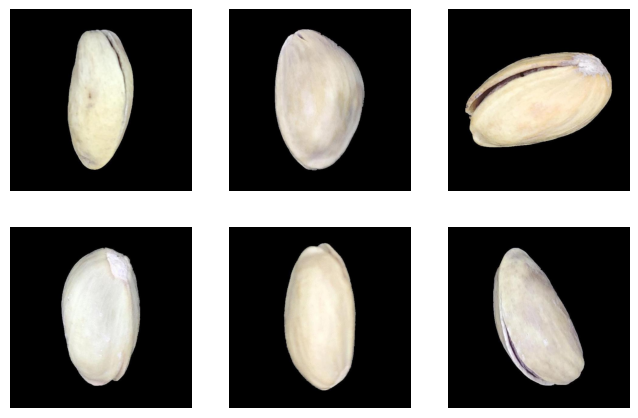

In [ ]:
plt.figure(figsize=(8, 8))

for i in range(6):
    img_path = os.path.join(folder_path, file_names[i])  # path gambar
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR ke RGB
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


Disini, saya menampilkan 6 gambar dari folder image dalam bentuk grid pake cv2.imread lalu diconvert dari format BGR ke RGB biar warnanya sesuai saat ditampilkan. Gambar-gambar di plot menggunakan matplotlib dengan layout 3x3.

## Data Normalization

In [ ]:
image_list = []

for file in file_names:
    img_path = os.path.join(folder_path, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100, 100))  # resize 100x100
    img = img_to_array(img)
    img = (img.astype('float32') - 127.5) / 127.5  # normalisasi ke [-1, 1]
    image_list.append(img)

# konversi array numpy
train_images = np.array(image_list)
print(f"Dataset after normalization: {train_images.shape}")

Dataset after normalization: (1074, 100, 100, 3)


Disini, saya mengubah format gambarnya ke RGB dan di resize jadi 100 x 100 dan dinormalisasikan ke -1 dan 1 karena nanti kan pake TanH. Lalu gambar yang udah di proses dimasukan ke train_images.

## Baseline Model

### Define Generator Network

In [ ]:
from tensorflow.keras import layers, models

# input noise
noise_dim = 100
generator_input = layers.Input(shape=(noise_dim,))

# expand noise ke bentuk spatial
x = layers.Dense(25 * 25 * 16)(generator_input)
x = layers.Reshape((25, 25, 16))(x)

# conv 3x3, stride 1, valid padding, 16, 32, 64 filter, ReLU
x = layers.Conv2D(16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 1
x = layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 2
x = layers.Conv2D(64, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 3

# upsampling biar 100x100
x = layers.Conv2DTranspose(64, kernel_size=4, strides=5, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(32, kernel_size=6, strides=1, padding='valid', activation='relu')(x)

# output tanh layer
output_image = layers.Conv2D(3, kernel_size=3, strides=1, padding='same', activation='tanh')(x)  # tanh activation function

# model generator
generator_model = models.Model(generator_input, output_image)
generator_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10000)          │     1,010,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 23, 23, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 95, 95, 64)     │        65,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 100, 100, 32)   │        73,760 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,175,683 (4.48 MB)

 Trainable params: 1,175,683 (4.48 MB)

 Non-trainable params: 0 (0.00 B)

Disini saya membuat dulu arsitektur generator nya dengan input noise 100, lalu di expand ke bentuk spatial. Lalu membuat 3 layer dengan conv 3x3, stride 1, padding valid, filternya 16, 32, 64, ReLu activation function. Lalu saya lakukan upsampling juga agar ukuran outputnya jadi 100 x 100. Lalu pada layer output menggunakan tanh. Dapat dilihat summary modelnya juga udah sesuai.

### Define Discriminator Network

In [ ]:
from tensorflow.keras import layers, models

input_image = layers.Input(shape=(100, 100, 3))

# conv 3x3, stride 1, valid padding, 16, 32, 64 filter, ReLU
x = layers.Conv2D(16, kernel_size=3, strides=1, padding='valid', activation='relu')(input_image)  # layer 1
x = layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 2
x = layers.Conv2D(64, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 3

# flatten dan fully connected layer dengan sigmoid
x = layers.Flatten()(x)

output = layers.Dense(1, activation='sigmoid')(x)

# model diskriminator
discriminator_model = models.Model(input_image, output)
discriminator_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 96, 96, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 565504)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       565,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 589,089 (2.25 MB)

 Trainable params: 589,089 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

Disini saya membuat arsitektur discriminator buat ngebedain gambar dengan input shape 100 100 3. Lalu membuat 3 layer dengan conv 3x3, stride 1, padding valid, filternya 16, 32, 64, ReLu activation function. Lalu membuat fully connected layer dengan activation sigmoid. Dapat dilihat summary modelnya juga udah sesuai.

### Optimizer Adam and Loss Binary Crossentropy

In [ ]:
# optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005, beta_1=0.5)
discriminator_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

Disini saya membuat optimizer dengan adam dan loss binary crossentropy

### GAN (Combined Model)

In [ ]:
discriminator_model.trainable = False  # freeze discriminator supaya cuma generator yang dilatih di GAN

# define GAN combined model
generated_image = generator_model(generator_input)
gan_output = discriminator_model(generated_image)

gan_model = tf.keras.models.Model(generator_input, gan_output)
gan_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 100, 100, 3)    │     1,175,683 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 1)              │       589,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,764,772 (6.73 MB)

 Trainable params: 1,175,683 (4.48 MB)

 Non-trainable params: 589,089 (2.25 MB)

Disini saya freeze dulu discriminatornya supaya cuma generator yang dilatih di GAN, kemudian saya mendefine combined modelnya dan dapat dilihat arsitekturnya udah sesuai.

In [ ]:
# compiling
adam_optimizer_gan = tf.keras.optimizers.Adam(learning_rate=0.00005, beta_1=0.5)
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer_gan)

Disini, saya buat optimizer lagi untuk model GAN biar ga nyampur dan ga dikenali oleh model GAN, masih sama sama menggunakan optimizer Adam dan binarycrossentropy

### Define Data Generators

In [ ]:
# list index
indices = [i for i in range(len(train_images))]

# generate noise random
def get_random_noise(batch_size, noise_dim):
    random_values = np.random.randn(batch_size * noise_dim)
    return np.reshape(random_values, (batch_size, noise_dim))

# generate fake samples
def get_fake_samples(generator_model, batch_size, noise_dim):
    noise = get_random_noise(batch_size, noise_dim)
    fake_images = generator_model.predict_on_batch(noise)
    return fake_images

# ambil real samples
def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = train_images[random_indices]
    return real_images

# visualisasi
def show_generator_results(generator_model, noise_dim, num_images=9):
    noise = get_random_noise(num_images, noise_dim)
    fake_images = generator_model.predict(noise)

    plt.figure(figsize=(7, 7))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow((fake_images[i] + 1) / 2)  # denormalisasi ke [0,1] buat ditampilin
        plt.axis('off')
    plt.show()


Disini, saya buat list index dulu untuk real image sampling, kemudian saya generate noise random, fake samples dari generator, ambil real samples dari dataset dan terakhir saya visualisasikan hasil generatornya.

### Train GAN Model

In [ ]:
tf.config.run_functions_eagerly(True)  # eager execution


Generator on Epoch 0


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


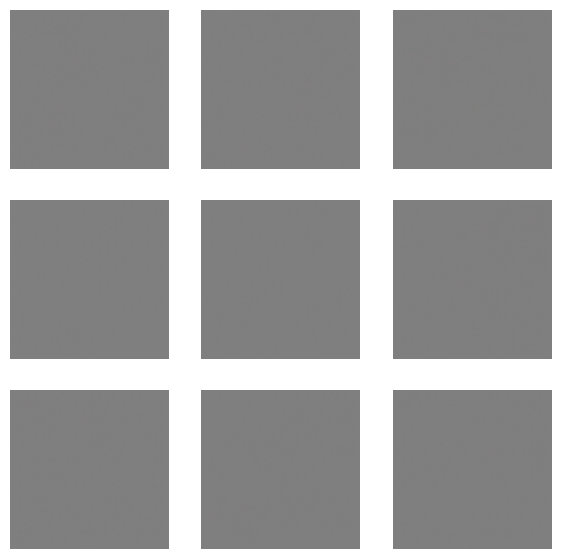

Epoch 0, Step 0, D Loss: 0.723, D Acc: 46.00%, G Loss: 0.688
Epoch 1, Step 0, D Loss: 0.363, D Acc: 71.71%, G Loss: 0.717
Epoch 2, Step 0, D Loss: 0.294, D Acc: 85.51%, G Loss: 0.922
Epoch 3, Step 0, D Loss: 0.215, D Acc: 90.26%, G Loss: 1.456
Epoch 4, Step 0, D Loss: 0.166, D Acc: 92.67%, G Loss: 1.962
Epoch 5, Step 0, D Loss: 0.134, D Acc: 94.12%, G Loss: 2.474
Epoch 6, Step 0, D Loss: 0.113, D Acc: 95.09%, G Loss: 2.967
Epoch 7, Step 0, D Loss: 0.097, D Acc: 95.79%, G Loss: 3.424
Epoch 8, Step 0, D Loss: 0.085, D Acc: 96.31%, G Loss: 3.838
Epoch 9, Step 0, D Loss: 0.075, D Acc: 96.72%, G Loss: 4.182

Generator on Epoch 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


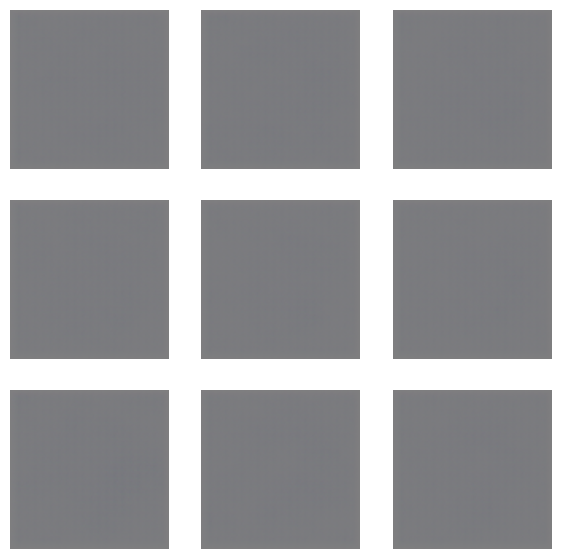

Epoch 10, Step 0, D Loss: 0.068, D Acc: 97.04%, G Loss: 4.466
Epoch 11, Step 0, D Loss: 0.062, D Acc: 97.31%, G Loss: 4.570
Epoch 12, Step 0, D Loss: 0.079, D Acc: 96.90%, G Loss: 4.705
Epoch 13, Step 0, D Loss: 0.074, D Acc: 97.13%, G Loss: 4.668
Epoch 14, Step 0, D Loss: 0.071, D Acc: 97.30%, G Loss: 4.621
Epoch 15, Step 0, D Loss: 0.068, D Acc: 97.45%, G Loss: 4.618
Epoch 16, Step 0, D Loss: 0.091, D Acc: 96.97%, G Loss: 4.600
Epoch 17, Step 0, D Loss: 0.151, D Acc: 95.33%, G Loss: 4.496
Epoch 18, Step 0, D Loss: 0.185, D Acc: 93.76%, G Loss: 4.344
Epoch 19, Step 0, D Loss: 0.217, D Acc: 92.28%, G Loss: 4.205

Generator on Epoch 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


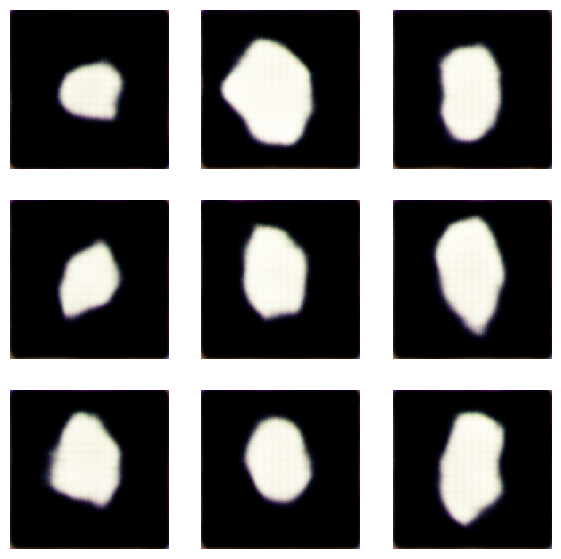

Epoch 20, Step 0, D Loss: 0.240, D Acc: 90.95%, G Loss: 4.069
Epoch 21, Step 0, D Loss: 0.253, D Acc: 90.21%, G Loss: 3.953
Epoch 22, Step 0, D Loss: 0.257, D Acc: 90.15%, G Loss: 3.851
Epoch 23, Step 0, D Loss: 0.258, D Acc: 90.20%, G Loss: 3.760
Epoch 24, Step 0, D Loss: 0.261, D Acc: 90.15%, G Loss: 3.678
Epoch 25, Step 0, D Loss: 0.263, D Acc: 90.11%, G Loss: 3.604
Epoch 26, Step 0, D Loss: 0.270, D Acc: 89.74%, G Loss: 3.540
Epoch 27, Step 0, D Loss: 0.275, D Acc: 89.44%, G Loss: 3.472
Epoch 28, Step 0, D Loss: 0.283, D Acc: 88.93%, G Loss: 3.402
Epoch 29, Step 0, D Loss: 0.291, D Acc: 88.46%, G Loss: 3.332

Generator on Epoch 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


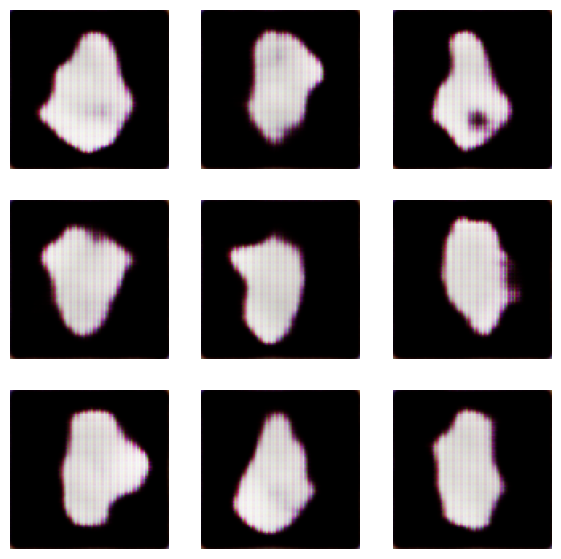

Epoch 30, Step 0, D Loss: 0.297, D Acc: 88.15%, G Loss: 3.268
Epoch 31, Step 0, D Loss: 0.301, D Acc: 87.95%, G Loss: 3.208
Epoch 32, Step 0, D Loss: 0.305, D Acc: 87.84%, G Loss: 3.152
Epoch 33, Step 0, D Loss: 0.309, D Acc: 87.71%, G Loss: 3.100
Epoch 34, Step 0, D Loss: 0.310, D Acc: 87.79%, G Loss: 3.052
Epoch 35, Step 0, D Loss: 0.315, D Acc: 87.53%, G Loss: 3.007
Epoch 36, Step 0, D Loss: 0.322, D Acc: 87.07%, G Loss: 2.957
Epoch 37, Step 0, D Loss: 0.326, D Acc: 86.91%, G Loss: 2.909
Epoch 38, Step 0, D Loss: 0.329, D Acc: 86.83%, G Loss: 2.868
Epoch 39, Step 0, D Loss: 0.332, D Acc: 86.64%, G Loss: 2.830

Generator on Epoch 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


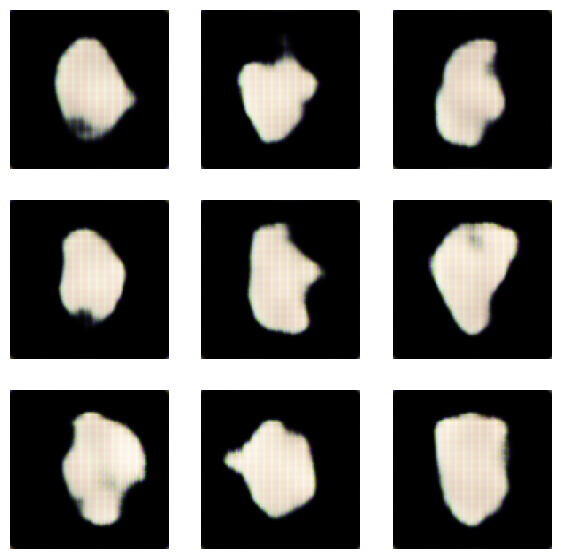

Epoch 40, Step 0, D Loss: 0.334, D Acc: 86.53%, G Loss: 2.793
Epoch 41, Step 0, D Loss: 0.336, D Acc: 86.52%, G Loss: 2.756
Epoch 42, Step 0, D Loss: 0.338, D Acc: 86.43%, G Loss: 2.721
Epoch 43, Step 0, D Loss: 0.340, D Acc: 86.41%, G Loss: 2.688
Epoch 44, Step 0, D Loss: 0.340, D Acc: 86.50%, G Loss: 2.661
Epoch 45, Step 0, D Loss: 0.341, D Acc: 86.43%, G Loss: 2.636
Epoch 46, Step 0, D Loss: 0.342, D Acc: 86.42%, G Loss: 2.611
Epoch 47, Step 0, D Loss: 0.342, D Acc: 86.51%, G Loss: 2.586
Epoch 48, Step 0, D Loss: 0.344, D Acc: 86.43%, G Loss: 2.560
Epoch 49, Step 0, D Loss: 0.346, D Acc: 86.28%, G Loss: 2.535

Generator on Epoch 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


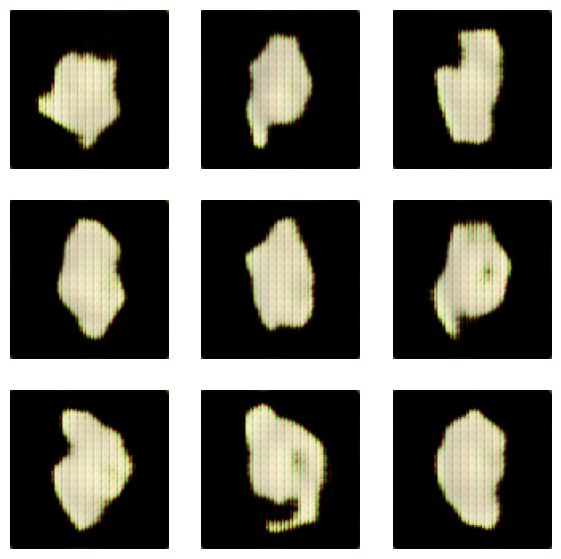

Epoch 50, Step 0, D Loss: 0.347, D Acc: 86.30%, G Loss: 2.517
Epoch 51, Step 0, D Loss: 0.351, D Acc: 86.09%, G Loss: 2.493
Epoch 52, Step 0, D Loss: 0.354, D Acc: 85.94%, G Loss: 2.469
Epoch 53, Step 0, D Loss: 0.355, D Acc: 85.99%, G Loss: 2.445
Epoch 54, Step 0, D Loss: 0.357, D Acc: 85.98%, G Loss: 2.421
Epoch 55, Step 0, D Loss: 0.358, D Acc: 86.00%, G Loss: 2.398
Epoch 56, Step 0, D Loss: 0.360, D Acc: 86.01%, G Loss: 2.376
Epoch 57, Step 0, D Loss: 0.362, D Acc: 85.83%, G Loss: 2.358
Epoch 58, Step 0, D Loss: 0.363, D Acc: 85.70%, G Loss: 2.339
Epoch 59, Step 0, D Loss: 0.364, D Acc: 85.72%, G Loss: 2.320

Generator on Epoch 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


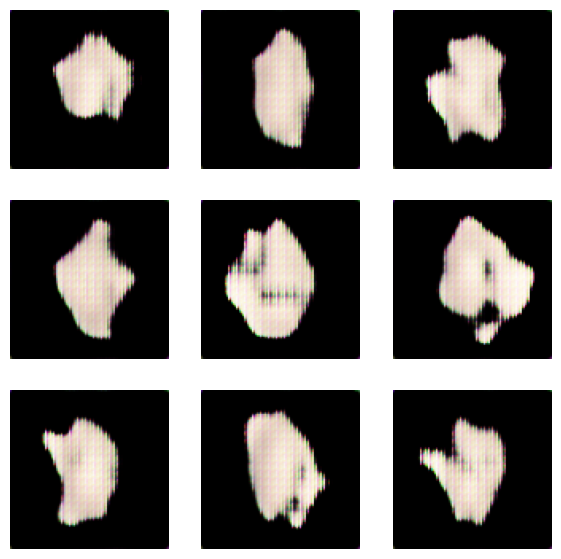

Epoch 60, Step 0, D Loss: 0.365, D Acc: 85.77%, G Loss: 2.303
Epoch 61, Step 0, D Loss: 0.365, D Acc: 85.86%, G Loss: 2.288
Epoch 62, Step 0, D Loss: 0.365, D Acc: 85.95%, G Loss: 2.274
Epoch 63, Step 0, D Loss: 0.364, D Acc: 86.05%, G Loss: 2.259
Epoch 64, Step 0, D Loss: 0.365, D Acc: 86.11%, G Loss: 2.244
Epoch 65, Step 0, D Loss: 0.365, D Acc: 86.15%, G Loss: 2.230
Epoch 66, Step 0, D Loss: 0.365, D Acc: 86.27%, G Loss: 2.217
Epoch 67, Step 0, D Loss: 0.365, D Acc: 86.33%, G Loss: 2.205
Epoch 68, Step 0, D Loss: 0.365, D Acc: 86.39%, G Loss: 2.193
Epoch 69, Step 0, D Loss: 0.366, D Acc: 86.23%, G Loss: 2.181

Generator on Epoch 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


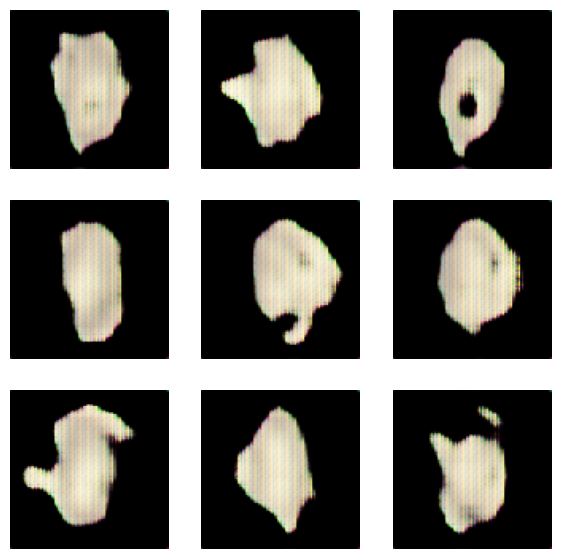

Epoch 70, Step 0, D Loss: 0.367, D Acc: 86.26%, G Loss: 2.167
Epoch 71, Step 0, D Loss: 0.368, D Acc: 86.19%, G Loss: 2.155
Epoch 72, Step 0, D Loss: 0.369, D Acc: 86.15%, G Loss: 2.143
Epoch 73, Step 0, D Loss: 0.369, D Acc: 86.23%, G Loss: 2.132
Epoch 74, Step 0, D Loss: 0.369, D Acc: 86.31%, G Loss: 2.121
Epoch 75, Step 0, D Loss: 0.369, D Acc: 86.38%, G Loss: 2.110
Epoch 76, Step 0, D Loss: 0.369, D Acc: 86.44%, G Loss: 2.100
Epoch 77, Step 0, D Loss: 0.369, D Acc: 86.51%, G Loss: 2.091
Epoch 78, Step 0, D Loss: 0.370, D Acc: 86.47%, G Loss: 2.088
Epoch 79, Step 0, D Loss: 0.371, D Acc: 86.42%, G Loss: 2.081

Generator on Epoch 80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


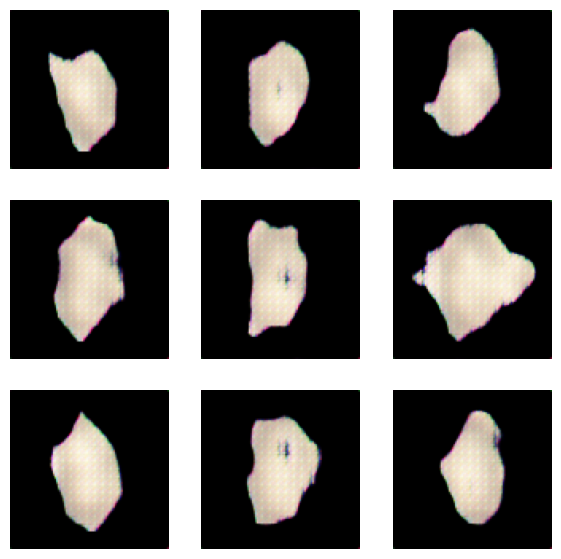

Epoch 80, Step 0, D Loss: 0.372, D Acc: 86.38%, G Loss: 2.071
Epoch 81, Step 0, D Loss: 0.372, D Acc: 86.41%, G Loss: 2.060
Epoch 82, Step 0, D Loss: 0.373, D Acc: 86.45%, G Loss: 2.050
Epoch 83, Step 0, D Loss: 0.373, D Acc: 86.52%, G Loss: 2.040
Epoch 84, Step 0, D Loss: 0.373, D Acc: 86.54%, G Loss: 2.031
Epoch 85, Step 0, D Loss: 0.373, D Acc: 86.61%, G Loss: 2.023
Epoch 86, Step 0, D Loss: 0.373, D Acc: 86.68%, G Loss: 2.014
Epoch 87, Step 0, D Loss: 0.373, D Acc: 86.69%, G Loss: 2.009
Epoch 88, Step 0, D Loss: 0.372, D Acc: 86.72%, G Loss: 2.014
Epoch 89, Step 0, D Loss: 0.373, D Acc: 86.64%, G Loss: 2.011

Generator on Epoch 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


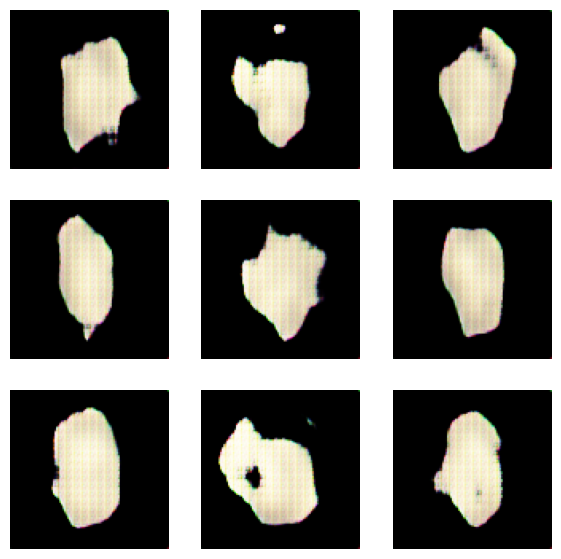

Epoch 90, Step 0, D Loss: 0.373, D Acc: 86.67%, G Loss: 2.007
Epoch 91, Step 0, D Loss: 0.374, D Acc: 86.53%, G Loss: 1.997
Epoch 92, Step 0, D Loss: 0.376, D Acc: 86.47%, G Loss: 1.988
Epoch 93, Step 0, D Loss: 0.377, D Acc: 86.38%, G Loss: 1.979
Epoch 94, Step 0, D Loss: 0.378, D Acc: 86.32%, G Loss: 1.970
Epoch 95, Step 0, D Loss: 0.379, D Acc: 86.29%, G Loss: 1.961
Epoch 96, Step 0, D Loss: 0.380, D Acc: 86.24%, G Loss: 1.953
Epoch 97, Step 0, D Loss: 0.381, D Acc: 86.23%, G Loss: 1.945
Epoch 98, Step 0, D Loss: 0.381, D Acc: 86.17%, G Loss: 1.938
Epoch 99, Step 0, D Loss: 0.382, D Acc: 86.09%, G Loss: 1.930

Generator on Epoch 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


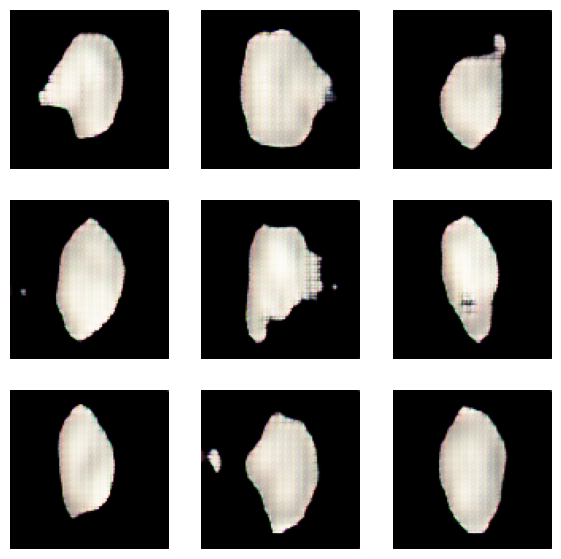

Epoch 100, Step 0, D Loss: 0.383, D Acc: 86.05%, G Loss: 1.922
Epoch 101, Step 0, D Loss: 0.384, D Acc: 85.99%, G Loss: 1.914
Epoch 102, Step 0, D Loss: 0.386, D Acc: 85.83%, G Loss: 1.906
Epoch 103, Step 0, D Loss: 0.388, D Acc: 85.71%, G Loss: 1.898
Epoch 104, Step 0, D Loss: 0.389, D Acc: 85.61%, G Loss: 1.891
Epoch 105, Step 0, D Loss: 0.390, D Acc: 85.50%, G Loss: 1.883
Epoch 106, Step 0, D Loss: 0.392, D Acc: 85.38%, G Loss: 1.875
Epoch 107, Step 0, D Loss: 0.393, D Acc: 85.23%, G Loss: 1.868
Epoch 108, Step 0, D Loss: 0.395, D Acc: 85.11%, G Loss: 1.860
Epoch 109, Step 0, D Loss: 0.396, D Acc: 84.97%, G Loss: 1.852

Generator on Epoch 110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


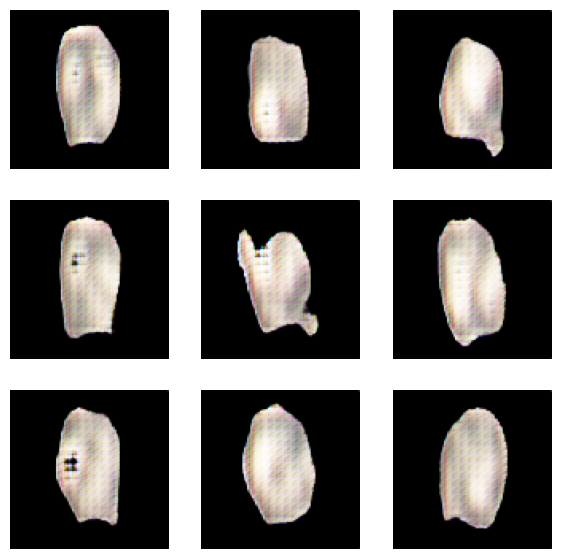

Epoch 110, Step 0, D Loss: 0.398, D Acc: 84.81%, G Loss: 1.844
Epoch 111, Step 0, D Loss: 0.399, D Acc: 84.69%, G Loss: 1.837
Epoch 112, Step 0, D Loss: 0.401, D Acc: 84.60%, G Loss: 1.831
Epoch 113, Step 0, D Loss: 0.402, D Acc: 84.52%, G Loss: 1.823
Epoch 114, Step 0, D Loss: 0.403, D Acc: 84.38%, G Loss: 1.816
Epoch 115, Step 0, D Loss: 0.405, D Acc: 84.23%, G Loss: 1.809
Epoch 116, Step 0, D Loss: 0.406, D Acc: 84.11%, G Loss: 1.802
Epoch 117, Step 0, D Loss: 0.407, D Acc: 84.00%, G Loss: 1.796
Epoch 118, Step 0, D Loss: 0.409, D Acc: 83.91%, G Loss: 1.789
Epoch 119, Step 0, D Loss: 0.410, D Acc: 83.82%, G Loss: 1.783

Generator on Epoch 120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


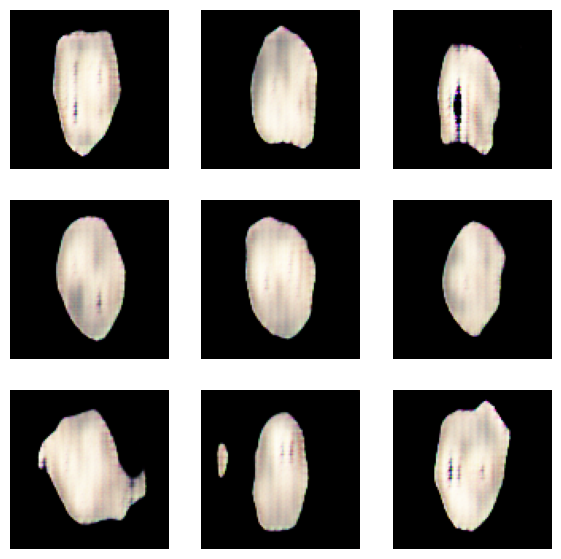

Epoch 120, Step 0, D Loss: 0.411, D Acc: 83.74%, G Loss: 1.777
Epoch 121, Step 0, D Loss: 0.412, D Acc: 83.68%, G Loss: 1.771
Epoch 122, Step 0, D Loss: 0.413, D Acc: 83.57%, G Loss: 1.765
Epoch 123, Step 0, D Loss: 0.414, D Acc: 83.50%, G Loss: 1.759
Epoch 124, Step 0, D Loss: 0.415, D Acc: 83.43%, G Loss: 1.754
Epoch 125, Step 0, D Loss: 0.416, D Acc: 83.30%, G Loss: 1.751
Epoch 126, Step 0, D Loss: 0.417, D Acc: 83.21%, G Loss: 1.745
Epoch 127, Step 0, D Loss: 0.418, D Acc: 83.12%, G Loss: 1.738
Epoch 128, Step 0, D Loss: 0.419, D Acc: 83.05%, G Loss: 1.732
Epoch 129, Step 0, D Loss: 0.420, D Acc: 82.98%, G Loss: 1.727

Generator on Epoch 130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


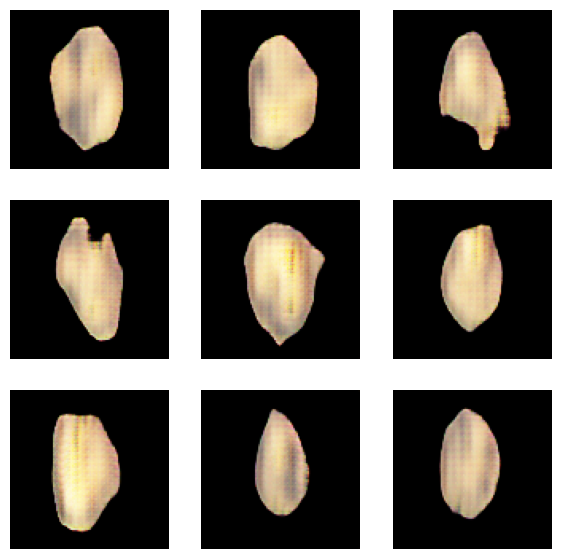

Epoch 130, Step 0, D Loss: 0.421, D Acc: 82.90%, G Loss: 1.721
Epoch 131, Step 0, D Loss: 0.422, D Acc: 82.85%, G Loss: 1.721
Epoch 132, Step 0, D Loss: 0.423, D Acc: 82.79%, G Loss: 1.717
Epoch 133, Step 0, D Loss: 0.424, D Acc: 82.68%, G Loss: 1.711
Epoch 134, Step 0, D Loss: 0.425, D Acc: 82.60%, G Loss: 1.706
Epoch 135, Step 0, D Loss: 0.426, D Acc: 82.52%, G Loss: 1.700
Epoch 136, Step 0, D Loss: 0.427, D Acc: 82.46%, G Loss: 1.697
Epoch 137, Step 0, D Loss: 0.427, D Acc: 82.41%, G Loss: 1.697
Epoch 138, Step 0, D Loss: 0.428, D Acc: 82.37%, G Loss: 1.693
Epoch 139, Step 0, D Loss: 0.429, D Acc: 82.25%, G Loss: 1.688

Generator on Epoch 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


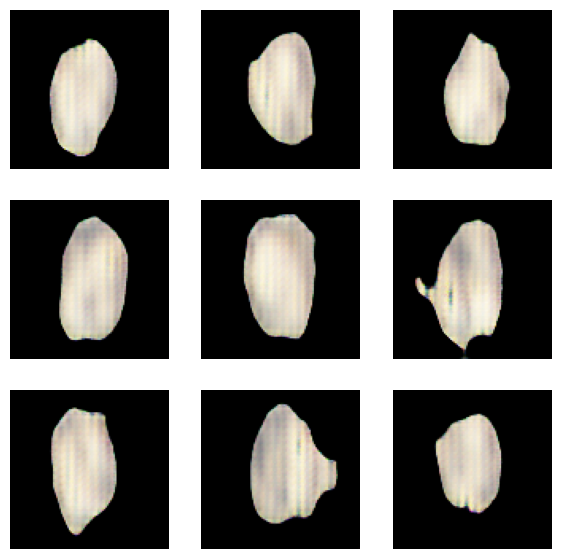

Epoch 140, Step 0, D Loss: 0.431, D Acc: 82.14%, G Loss: 1.682
Epoch 141, Step 0, D Loss: 0.432, D Acc: 82.06%, G Loss: 1.677
Epoch 142, Step 0, D Loss: 0.432, D Acc: 82.00%, G Loss: 1.672
Epoch 143, Step 0, D Loss: 0.433, D Acc: 81.96%, G Loss: 1.667
Epoch 144, Step 0, D Loss: 0.434, D Acc: 81.90%, G Loss: 1.663
Epoch 145, Step 0, D Loss: 0.435, D Acc: 81.84%, G Loss: 1.658
Epoch 146, Step 0, D Loss: 0.435, D Acc: 81.79%, G Loss: 1.654
Epoch 147, Step 0, D Loss: 0.436, D Acc: 81.74%, G Loss: 1.650
Epoch 148, Step 0, D Loss: 0.437, D Acc: 81.70%, G Loss: 1.646
Epoch 149, Step 0, D Loss: 0.438, D Acc: 81.63%, G Loss: 1.641

Generator on Epoch 150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


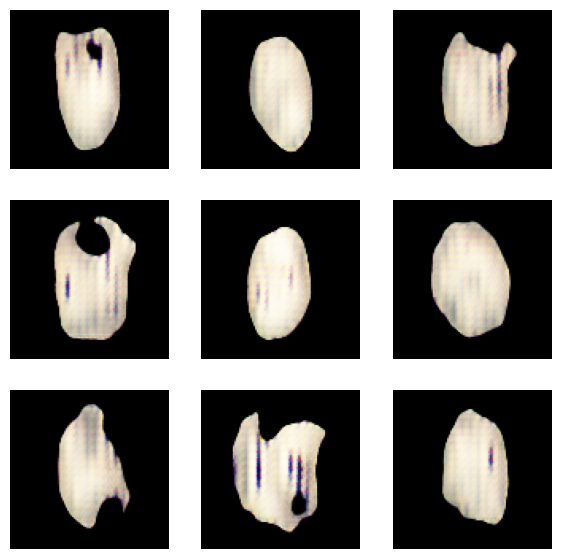

Epoch 150, Step 0, D Loss: 0.438, D Acc: 81.56%, G Loss: 1.637
Epoch 151, Step 0, D Loss: 0.439, D Acc: 81.53%, G Loss: 1.632
Epoch 152, Step 0, D Loss: 0.440, D Acc: 81.47%, G Loss: 1.628
Epoch 153, Step 0, D Loss: 0.440, D Acc: 81.43%, G Loss: 1.624
Epoch 154, Step 0, D Loss: 0.441, D Acc: 81.39%, G Loss: 1.620
Epoch 155, Step 0, D Loss: 0.442, D Acc: 81.34%, G Loss: 1.616
Epoch 156, Step 0, D Loss: 0.442, D Acc: 81.28%, G Loss: 1.612
Epoch 157, Step 0, D Loss: 0.443, D Acc: 81.20%, G Loss: 1.609
Epoch 158, Step 0, D Loss: 0.444, D Acc: 81.13%, G Loss: 1.605
Epoch 159, Step 0, D Loss: 0.445, D Acc: 81.07%, G Loss: 1.601

Generator on Epoch 160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


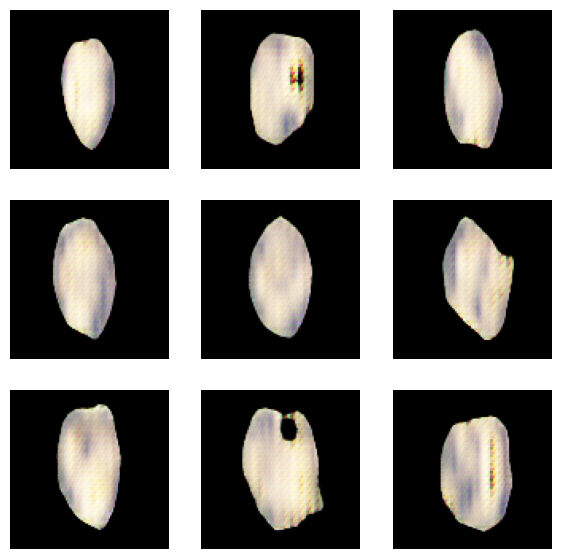

Epoch 160, Step 0, D Loss: 0.446, D Acc: 80.98%, G Loss: 1.597
Epoch 161, Step 0, D Loss: 0.446, D Acc: 80.91%, G Loss: 1.593
Epoch 162, Step 0, D Loss: 0.447, D Acc: 80.85%, G Loss: 1.589
Epoch 163, Step 0, D Loss: 0.448, D Acc: 80.79%, G Loss: 1.585
Epoch 164, Step 0, D Loss: 0.449, D Acc: 80.73%, G Loss: 1.582
Epoch 165, Step 0, D Loss: 0.449, D Acc: 80.68%, G Loss: 1.578
Epoch 166, Step 0, D Loss: 0.450, D Acc: 80.62%, G Loss: 1.574
Epoch 167, Step 0, D Loss: 0.451, D Acc: 80.55%, G Loss: 1.570
Epoch 168, Step 0, D Loss: 0.451, D Acc: 80.50%, G Loss: 1.567
Epoch 169, Step 0, D Loss: 0.452, D Acc: 80.43%, G Loss: 1.563

Generator on Epoch 170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


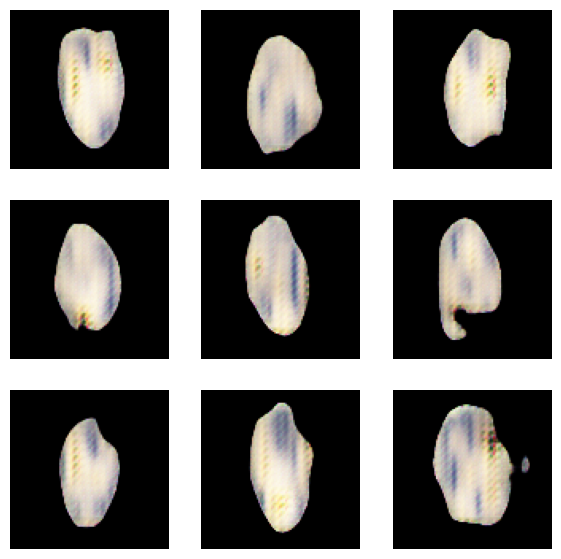

Epoch 170, Step 0, D Loss: 0.453, D Acc: 80.38%, G Loss: 1.559
Epoch 171, Step 0, D Loss: 0.453, D Acc: 80.32%, G Loss: 1.556
Epoch 172, Step 0, D Loss: 0.454, D Acc: 80.27%, G Loss: 1.552
Epoch 173, Step 0, D Loss: 0.455, D Acc: 80.21%, G Loss: 1.549
Epoch 174, Step 0, D Loss: 0.455, D Acc: 80.17%, G Loss: 1.546
Epoch 175, Step 0, D Loss: 0.456, D Acc: 80.13%, G Loss: 1.542
Epoch 176, Step 0, D Loss: 0.457, D Acc: 80.09%, G Loss: 1.539
Epoch 177, Step 0, D Loss: 0.457, D Acc: 80.04%, G Loss: 1.536
Epoch 178, Step 0, D Loss: 0.458, D Acc: 80.00%, G Loss: 1.533
Epoch 179, Step 0, D Loss: 0.458, D Acc: 79.95%, G Loss: 1.529

Generator on Epoch 180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


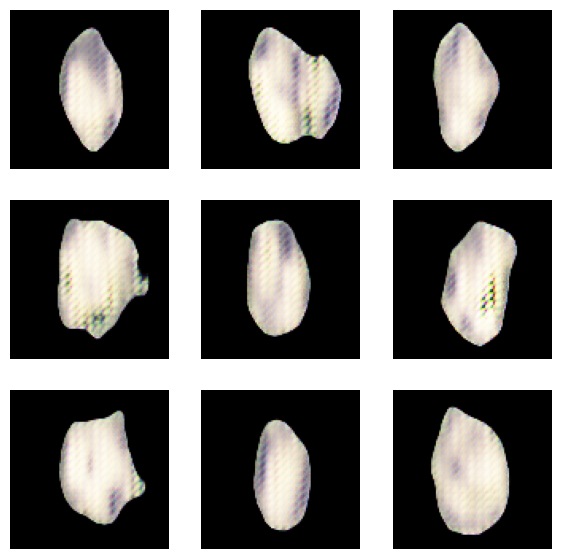

Epoch 180, Step 0, D Loss: 0.459, D Acc: 79.92%, G Loss: 1.526
Epoch 181, Step 0, D Loss: 0.459, D Acc: 79.87%, G Loss: 1.523
Epoch 182, Step 0, D Loss: 0.460, D Acc: 79.85%, G Loss: 1.520
Epoch 183, Step 0, D Loss: 0.460, D Acc: 79.81%, G Loss: 1.517
Epoch 184, Step 0, D Loss: 0.461, D Acc: 79.77%, G Loss: 1.514
Epoch 185, Step 0, D Loss: 0.462, D Acc: 79.72%, G Loss: 1.511
Epoch 186, Step 0, D Loss: 0.462, D Acc: 79.69%, G Loss: 1.508
Epoch 187, Step 0, D Loss: 0.463, D Acc: 79.65%, G Loss: 1.505
Epoch 188, Step 0, D Loss: 0.463, D Acc: 79.61%, G Loss: 1.503
Epoch 189, Step 0, D Loss: 0.464, D Acc: 79.57%, G Loss: 1.500

Generator on Epoch 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


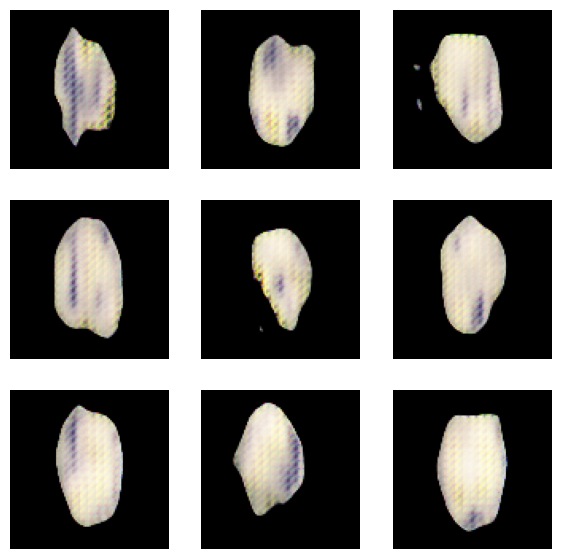

Epoch 190, Step 0, D Loss: 0.464, D Acc: 79.53%, G Loss: 1.497
Epoch 191, Step 0, D Loss: 0.464, D Acc: 79.50%, G Loss: 1.494
Epoch 192, Step 0, D Loss: 0.465, D Acc: 79.48%, G Loss: 1.492
Epoch 193, Step 0, D Loss: 0.465, D Acc: 79.44%, G Loss: 1.489
Epoch 194, Step 0, D Loss: 0.466, D Acc: 79.38%, G Loss: 1.487
Epoch 195, Step 0, D Loss: 0.466, D Acc: 79.35%, G Loss: 1.484
Epoch 196, Step 0, D Loss: 0.467, D Acc: 79.32%, G Loss: 1.481
Epoch 197, Step 0, D Loss: 0.467, D Acc: 79.29%, G Loss: 1.479
Epoch 198, Step 0, D Loss: 0.468, D Acc: 79.27%, G Loss: 1.476
Epoch 199, Step 0, D Loss: 0.468, D Acc: 79.25%, G Loss: 1.474


In [ ]:
epochs = 200
batch_size = 100
steps_per_epoch = 20

losses_d = []
losses_g = []

for epoch in range(epochs):

    if epoch % 10 == 0:
        print(f"\nGenerator on Epoch {epoch}")
        show_generator_results(generator_model, noise_dim)

    for step in range(steps_per_epoch):

        # 1. Latih Discriminator
        fake_images = get_fake_samples(generator_model, batch_size // 2, noise_dim)
        real_images = get_real_samples(batch_size // 2)

        combined_images = np.vstack((fake_images, real_images))
        labels = np.vstack((
            np.zeros((batch_size // 2, 1)),  # Fake = 0
            np.ones((batch_size // 2, 1))    # Real = 1
        ))

        discriminator_model.trainable = True
        loss_d = discriminator_model.train_on_batch(combined_images, labels)

        # 2. Latih Generator via GAN
        noise = get_random_noise(batch_size, noise_dim)
        misleading_labels = np.ones((batch_size, 1))  # Target = Real (biar generator nipu discriminator)

        discriminator_model.trainable = False
        loss_g = gan_model.train_on_batch(noise, misleading_labels)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)

        # Print tiap 50 step
        if step % 50 == 0:
            print(f"Epoch {epoch}, Step {step}, D Loss: {loss_d[0]:.3f}, D Acc: {loss_d[1]*100:.2f}%, G Loss: {loss_g:.3f}")


Selama proses training, discriminator awalnya cepat belajar membedakan gambar real dan fake, terlihat dari peningkatan akurasi hingga di atas 95% pada sekitar epoch ke-8. Sementara itu, loss Generator naik karena masih kesulitan menghasilkan gambar realistis. Setelah sekitar epoch ke-190, model mulai stabil, ditandai dengan loss Discriminator dan Generator yang cenderung konstan. Artinya, Generator sudah mulai mampu menghasilkan gambar yang cukup meyakinkan, meskipun Discriminator tetap bisa membedakan sebagian gambar.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


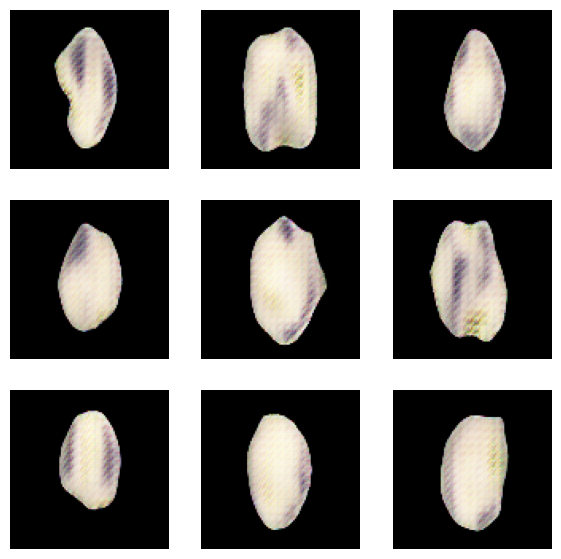

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


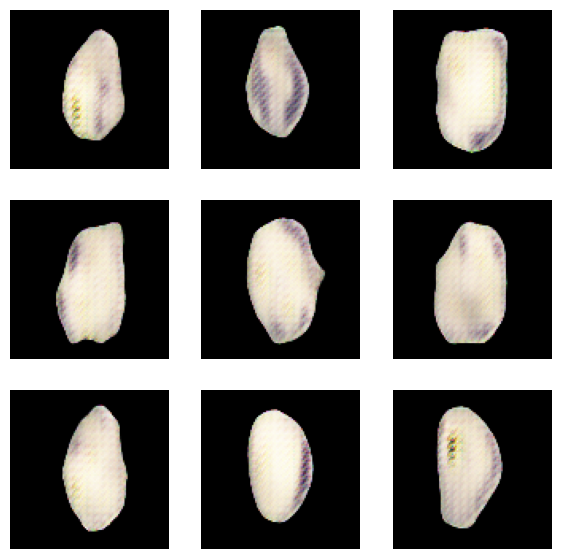

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


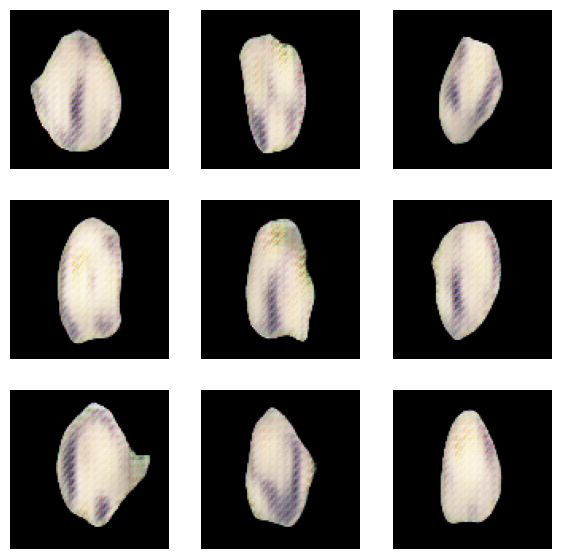

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


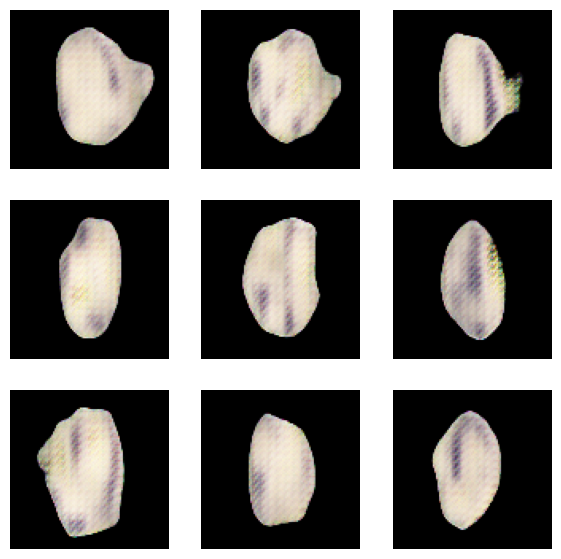

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


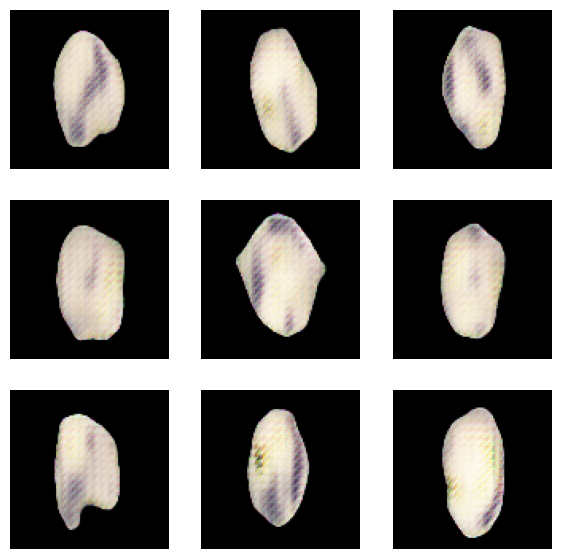

In [ ]:
for i in range(5):
    show_generator_results(generator_model, noise_dim)


Ini nge generate gambar gambar sampel

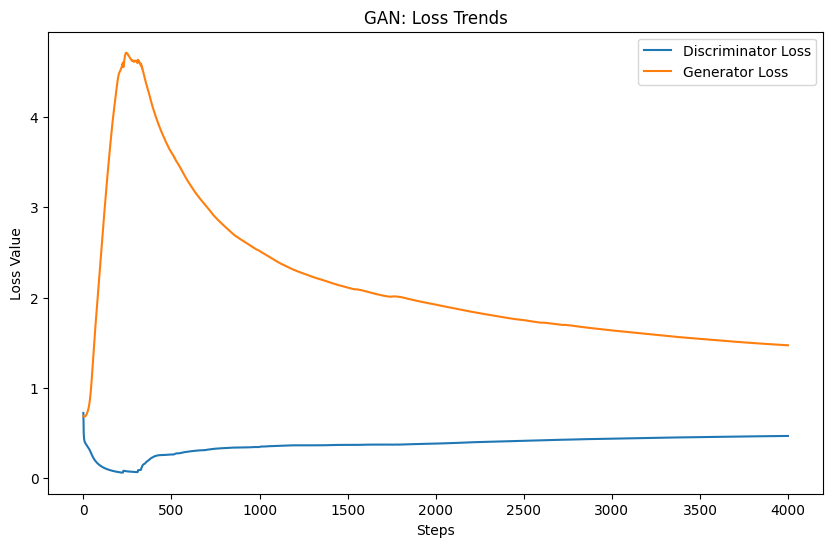

In [ ]:
# Visualisasi Loss Discriminator & Generator
steps = [i for i in range(len(losses_d))]

plt.figure(figsize=(10, 6))
plt.plot(steps[:5000], losses_d[:5000], label='Discriminator Loss')
plt.plot(steps[:5000], losses_g[:5000], label='Generator Loss')
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("GAN: Loss Trends")
plt.legend()
plt.show()


Dari grafik ini menunjukkan tren loss pada model GAN selama proses training. Generator loss awalnya naik tajam, lalu menurun secara bertahap, artinya generator semakin baik dalam menghasilkan data palsu. Sementara itu, discriminator loss menurun di awal dan kemudian naik perlahan, menunjukkan bahwa tugasnya membedakan data asli dan palsu makin sulit. Artinya pelatihan GAN berjalan normal dan berhasil beradaptasi dengan baik.

# 3.B

## Modified Model

### Define Generator Network

In [ ]:
from tensorflow.keras import layers, models

# input noise
noise_dim_mod = 50
generator_input_mod = layers.Input(shape=(noise_dim_mod,))

# expand noise ke bentuk spatial
x = layers.Dense(25 * 25 * 16)(generator_input_mod)
x = layers.Reshape((25, 25, 16))(x)

# conv 3x3, stride 1, valid padding, 16, 32, 64 filter, ReLU
x = layers.Conv2D(16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 1
x = layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 2
x = layers.Conv2D(64, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 3

# upsampling biar 100x100
x = layers.Conv2DTranspose(64, kernel_size=4, strides=5, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(32, kernel_size=6, strides=1, padding='valid', activation='relu')(x)

# output tanh layer
output_image_mod = layers.Conv2D(3, kernel_size=3, strides=1, padding='same', activation='tanh')(x)  # tanh activation function

# model generator
generator_model_mod = models.Model(generator_input_mod, output_image_mod)
generator_model_mod.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10000)          │       510,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 23, 23, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 95, 95, 64)     │        65,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 100, 100, 32)   │        73,760 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,683 (2.58 MB)

 Trainable params: 675,683 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

Di model modified ini, saya tidak mengubah arsitektur apapun, jadi saya hanya melakukan fine tuning atau mengubah nilai saja. Arsitektur generator input noisenya jadi 50, lalu di expand ke bentuk spatial. Lalu membuat 3 layer dengan conv 3x3, stride 1, padding valid, filternya 16, 32, 64, ReLu activation function. Lalu saya lakukan upsampling juga agar ukuran outputnya jadi 100 x 100. Lalu pada layer output menggunakan tanh. Dapat dilihat summary modelnya juga udah sesuai.

### Define Discriminator Network

In [ ]:
from tensorflow.keras import layers, models

input_image = layers.Input(shape=(100, 100, 3))

# conv 3x3, stride 1, valid padding, 16, 32, 64 filter, ReLU
x = layers.Conv2D(16, kernel_size=3, strides=1, padding='valid', activation='relu')(input_image)  # layer 1
x = layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 2
x = layers.Conv2D(64, kernel_size=3, strides=1, padding='valid', activation='relu')(x)  # layer 3

# flatten dan fully connected layer dengan sigmoid
x = layers.Flatten()(x)

output = layers.Dense(1, activation='sigmoid')(x)

# model diskriminator
discriminator_model = models.Model(input_image, output)
discriminator_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 96, 96, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 94, 94, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 565504)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │       565,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 589,089 (2.25 MB)

 Trainable params: 589,089 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

Pada bagian ini tidak diubah sama sekali. Disini saya membuat arsitektur discriminator buat ngebedain gambar dengan input shape 100 100 3. Lalu membuat 3 layer dengan conv 3x3, stride 1, padding valid, filternya 16, 32, 64, ReLu activation function. Lalu membuat fully connected layer dengan activation sigmoid. Dapat dilihat summary modelnya juga udah sesuai.

### Optimizer Adam and Loss Binary Crossentropy

In [ ]:
# optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.4)
discriminator_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

Disini saya mengubah nilai learning rate jadi 0.0001 dan beta_1 nya jadi 0.4 optimizer dengan adam dan loss binary crossentropy



### GAN (Combined Model)

In [ ]:
discriminator_model.trainable = False  # freeze discriminator supaya cuma generator yang dilatih di GAN

# define GAN combined model
generated_image_mod = generator_model_mod(generator_input_mod)
gan_output_mod = discriminator_model(generated_image_mod)

gan_model_mod = tf.keras.models.Model(generator_input_mod, gan_output_mod)
gan_model_mod.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 100, 100, 3)    │       675,683 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_4 (Functional)       │ (None, 1)              │       589,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,772 (4.82 MB)

 Trainable params: 675,683 (2.58 MB)

 Non-trainable params: 589,089 (2.25 MB)

Disini juga masih sama, hanya berubah saja nama nama variabelnya. Saya freeze dulu discriminatornya supaya cuma generator yang dilatih di GAN, kemudian saya mendefine combined modelnya dan dapat dilihat arsitekturnya udah sesuai.

In [ ]:
# compiling
adam_optimizer_gan = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.4)
gan_model_mod.compile(loss='binary_crossentropy', optimizer=adam_optimizer_gan)

Nah nilai nya sama saya ubah learning rate nya jadi 0.0001 dan beta nya jadi 0.4. Disini, saya buat optimizer lagi untuk model GAN biar ga nyampur dan ga dikenali oleh model GAN, masih sama sama menggunakan optimizer Adam dan binarycrossentropy

### Define Data Generators

In [ ]:
# list index
indices = [i for i in range(len(train_images))]

# generate noise random
def get_random_noise(batch_size, noise_dim_mod):
    random_values = np.random.randn(batch_size * noise_dim_mod)
    return np.reshape(random_values, (batch_size, noise_dim_mod))

# generate fake samples
def get_fake_samples(generator_model_mod, batch_size, noise_dim_mod):
    noise = get_random_noise(batch_size, noise_dim_mod)
    fake_images = generator_model_mod.predict_on_batch(noise)
    return fake_images

# ambil real samples
def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = train_images[random_indices]
    return real_images

# visualisasi
def show_generator_results(generator_model_mod, noise_dim_mod, num_images=9):
    noise = get_random_noise(num_images, noise_dim_mod)
    fake_images = generator_model_mod.predict(noise)

    plt.figure(figsize=(7, 7))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow((fake_images[i] + 1) / 2)  # denormalisasi ke [0,1]
        plt.axis('off')
    plt.show()


Disini juga masi sama, hanya berubah saja nama variabelnya. Saya buat list index dulu untuk real image sampling, kemudian saya generate noise random, fake samples dari generator, ambil real samples dari dataset dan terakhir saya visualisasikan hasil generatornya.

### Train GAN Model

In [ ]:
tf.config.run_functions_eagerly(True)  # eager execution


Generator on Epoch 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


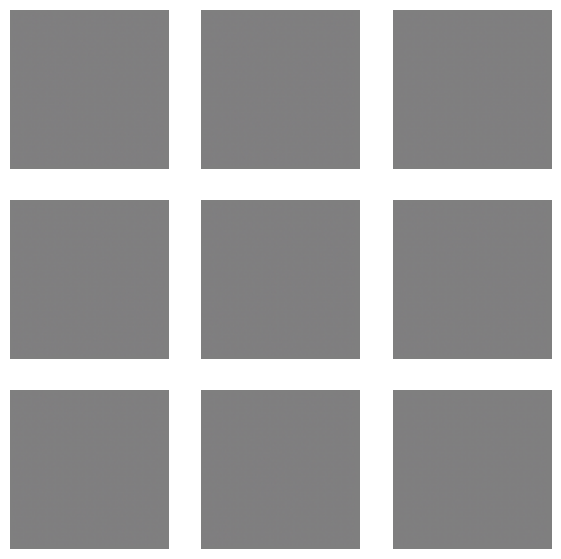

Epoch 0, Step 0, D Loss: 0.716, D Acc: 22.00%, G Loss: 0.685
Epoch 1, Step 0, D Loss: 0.292, D Acc: 85.38%, G Loss: 1.020
Epoch 2, Step 0, D Loss: 0.166, D Acc: 92.51%, G Loss: 2.053
Epoch 3, Step 0, D Loss: 0.112, D Acc: 94.97%, G Loss: 3.078
Epoch 4, Step 0, D Loss: 0.085, D Acc: 96.21%, G Loss: 3.811
Epoch 5, Step 0, D Loss: 0.068, D Acc: 96.96%, G Loss: 4.388
Epoch 6, Step 0, D Loss: 0.057, D Acc: 97.46%, G Loss: 4.860
Epoch 7, Step 0, D Loss: 0.049, D Acc: 97.82%, G Loss: 5.257
Epoch 8, Step 0, D Loss: 0.043, D Acc: 98.09%, G Loss: 5.601
Epoch 9, Step 0, D Loss: 0.038, D Acc: 98.30%, G Loss: 5.904

Generator on Epoch 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


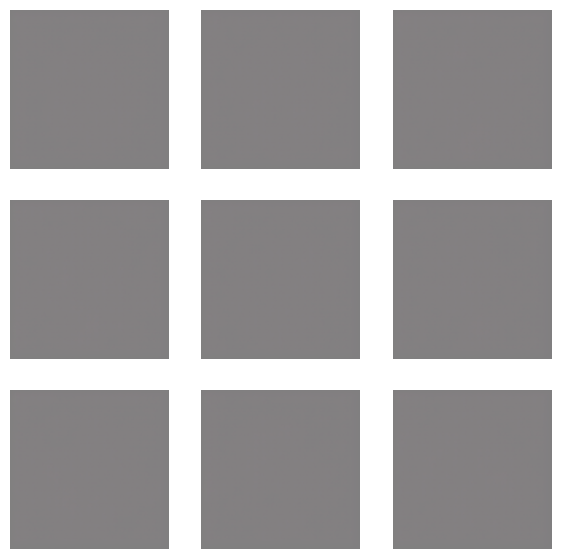

Epoch 10, Step 0, D Loss: 0.034, D Acc: 98.47%, G Loss: 6.173
Epoch 11, Step 0, D Loss: 0.031, D Acc: 98.61%, G Loss: 6.401
Epoch 12, Step 0, D Loss: 0.029, D Acc: 98.73%, G Loss: 6.610
Epoch 13, Step 0, D Loss: 0.027, D Acc: 98.82%, G Loss: 6.790
Epoch 14, Step 0, D Loss: 0.025, D Acc: 98.91%, G Loss: 6.948
Epoch 15, Step 0, D Loss: 0.023, D Acc: 98.98%, G Loss: 7.005
Epoch 16, Step 0, D Loss: 0.094, D Acc: 97.62%, G Loss: 6.806
Epoch 17, Step 0, D Loss: 0.116, D Acc: 96.59%, G Loss: 6.534
Epoch 18, Step 0, D Loss: 0.131, D Acc: 95.99%, G Loss: 6.254
Epoch 19, Step 0, D Loss: 0.151, D Acc: 94.83%, G Loss: 6.009

Generator on Epoch 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


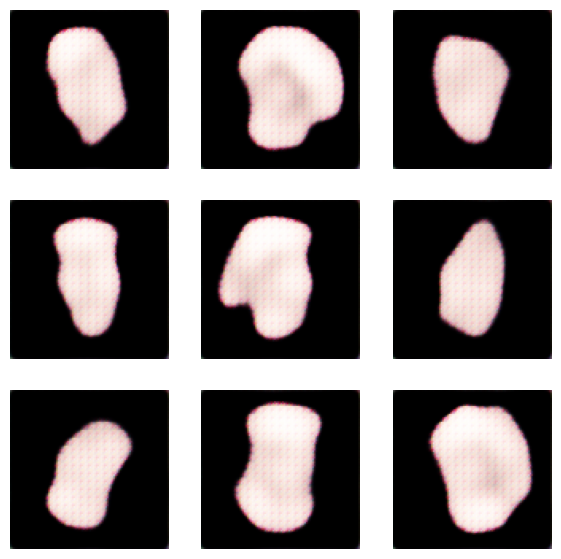

Epoch 20, Step 0, D Loss: 0.167, D Acc: 94.20%, G Loss: 5.774
Epoch 21, Step 0, D Loss: 0.185, D Acc: 93.12%, G Loss: 5.560
Epoch 22, Step 0, D Loss: 0.196, D Acc: 92.94%, G Loss: 5.367
Epoch 23, Step 0, D Loss: 0.207, D Acc: 92.53%, G Loss: 5.187
Epoch 24, Step 0, D Loss: 0.218, D Acc: 92.25%, G Loss: 5.026
Epoch 25, Step 0, D Loss: 0.226, D Acc: 92.05%, G Loss: 4.879
Epoch 26, Step 0, D Loss: 0.235, D Acc: 91.66%, G Loss: 4.742
Epoch 27, Step 0, D Loss: 0.244, D Acc: 91.31%, G Loss: 4.610
Epoch 28, Step 0, D Loss: 0.256, D Acc: 90.80%, G Loss: 4.487
Epoch 29, Step 0, D Loss: 0.264, D Acc: 90.57%, G Loss: 4.373

Generator on Epoch 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


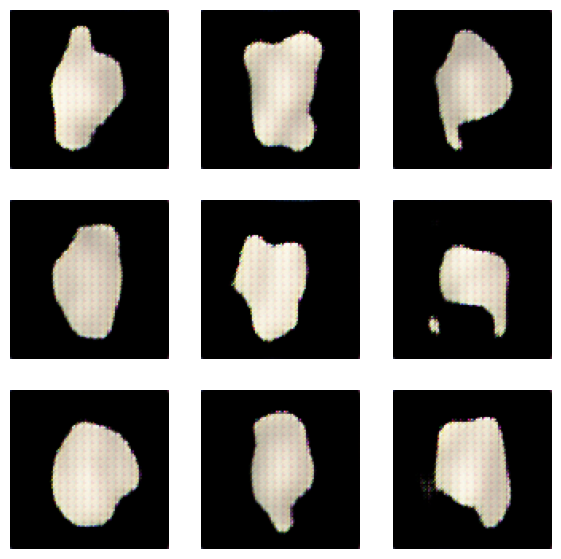

Epoch 30, Step 0, D Loss: 0.271, D Acc: 90.53%, G Loss: 4.264
Epoch 31, Step 0, D Loss: 0.278, D Acc: 90.49%, G Loss: 4.162
Epoch 32, Step 0, D Loss: 0.286, D Acc: 90.20%, G Loss: 4.069
Epoch 33, Step 0, D Loss: 0.292, D Acc: 90.14%, G Loss: 3.980
Epoch 34, Step 0, D Loss: 0.297, D Acc: 89.89%, G Loss: 3.900
Epoch 35, Step 0, D Loss: 0.303, D Acc: 89.65%, G Loss: 3.821
Epoch 36, Step 0, D Loss: 0.311, D Acc: 89.19%, G Loss: 3.748
Epoch 37, Step 0, D Loss: 0.318, D Acc: 88.75%, G Loss: 3.685
Epoch 38, Step 0, D Loss: 0.322, D Acc: 88.68%, G Loss: 3.618
Epoch 39, Step 0, D Loss: 0.326, D Acc: 88.58%, G Loss: 3.552

Generator on Epoch 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


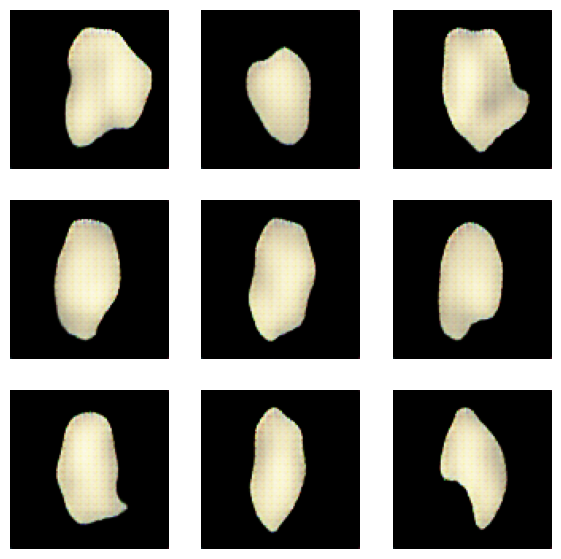

Epoch 40, Step 0, D Loss: 0.331, D Acc: 88.26%, G Loss: 3.493
Epoch 41, Step 0, D Loss: 0.335, D Acc: 87.99%, G Loss: 3.442
Epoch 42, Step 0, D Loss: 0.341, D Acc: 87.67%, G Loss: 3.394
Epoch 43, Step 0, D Loss: 0.346, D Acc: 87.47%, G Loss: 3.339
Epoch 44, Step 0, D Loss: 0.349, D Acc: 87.27%, G Loss: 3.287
Epoch 45, Step 0, D Loss: 0.355, D Acc: 86.94%, G Loss: 3.240
Epoch 46, Step 0, D Loss: 0.358, D Acc: 86.79%, G Loss: 3.193
Epoch 47, Step 0, D Loss: 0.361, D Acc: 86.60%, G Loss: 3.150
Epoch 48, Step 0, D Loss: 0.366, D Acc: 86.25%, G Loss: 3.121
Epoch 49, Step 0, D Loss: 0.368, D Acc: 86.20%, G Loss: 3.083

Generator on Epoch 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


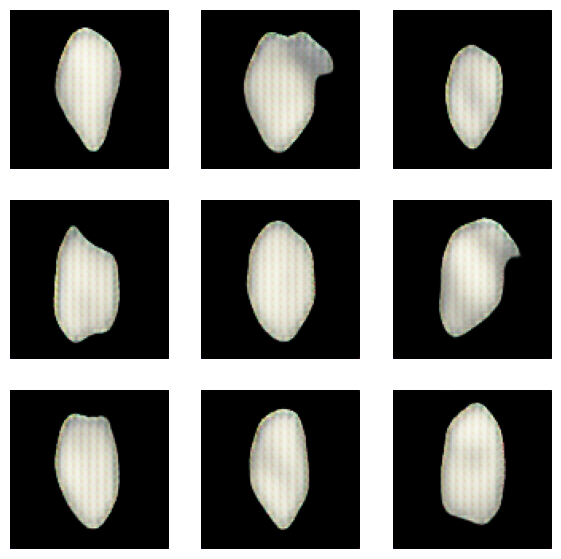

Epoch 50, Step 0, D Loss: 0.371, D Acc: 85.98%, G Loss: 3.042
Epoch 51, Step 0, D Loss: 0.374, D Acc: 85.81%, G Loss: 3.005
Epoch 52, Step 0, D Loss: 0.376, D Acc: 85.73%, G Loss: 2.969
Epoch 53, Step 0, D Loss: 0.378, D Acc: 85.57%, G Loss: 2.935
Epoch 54, Step 0, D Loss: 0.380, D Acc: 85.47%, G Loss: 2.904
Epoch 55, Step 0, D Loss: 0.382, D Acc: 85.33%, G Loss: 2.874
Epoch 56, Step 0, D Loss: 0.384, D Acc: 85.30%, G Loss: 2.842
Epoch 57, Step 0, D Loss: 0.386, D Acc: 85.17%, G Loss: 2.815
Epoch 58, Step 0, D Loss: 0.387, D Acc: 85.15%, G Loss: 2.786
Epoch 59, Step 0, D Loss: 0.388, D Acc: 85.14%, G Loss: 2.759

Generator on Epoch 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


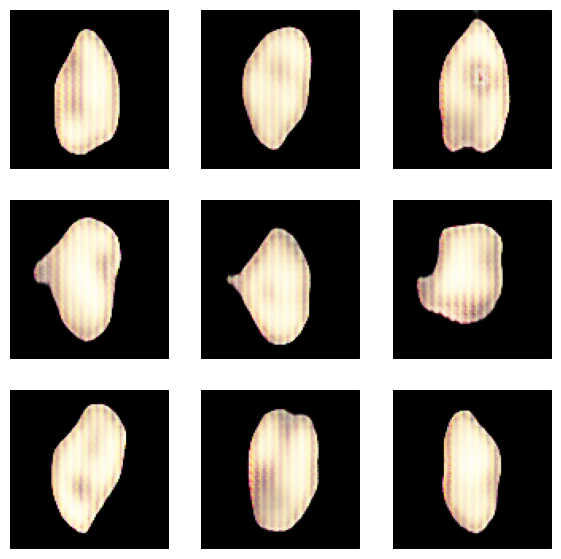

Epoch 60, Step 0, D Loss: 0.390, D Acc: 85.01%, G Loss: 2.735
Epoch 61, Step 0, D Loss: 0.392, D Acc: 84.91%, G Loss: 2.709
Epoch 62, Step 0, D Loss: 0.394, D Acc: 84.86%, G Loss: 2.684
Epoch 63, Step 0, D Loss: 0.395, D Acc: 84.79%, G Loss: 2.660
Epoch 64, Step 0, D Loss: 0.396, D Acc: 84.71%, G Loss: 2.636
Epoch 65, Step 0, D Loss: 0.398, D Acc: 84.61%, G Loss: 2.615
Epoch 66, Step 0, D Loss: 0.400, D Acc: 84.48%, G Loss: 2.593
Epoch 67, Step 0, D Loss: 0.402, D Acc: 84.39%, G Loss: 2.571
Epoch 68, Step 0, D Loss: 0.403, D Acc: 84.30%, G Loss: 2.550
Epoch 69, Step 0, D Loss: 0.405, D Acc: 84.25%, G Loss: 2.528

Generator on Epoch 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


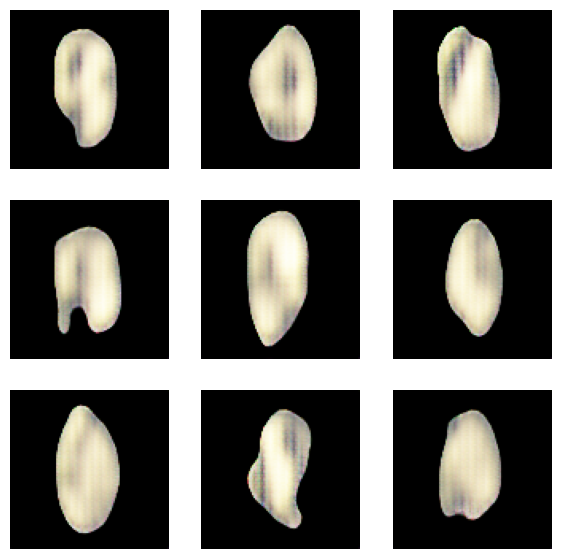

Epoch 70, Step 0, D Loss: 0.406, D Acc: 84.20%, G Loss: 2.509
Epoch 71, Step 0, D Loss: 0.407, D Acc: 84.11%, G Loss: 2.490
Epoch 72, Step 0, D Loss: 0.408, D Acc: 84.03%, G Loss: 2.473
Epoch 73, Step 0, D Loss: 0.409, D Acc: 84.02%, G Loss: 2.455
Epoch 74, Step 0, D Loss: 0.410, D Acc: 83.95%, G Loss: 2.441
Epoch 75, Step 0, D Loss: 0.411, D Acc: 83.91%, G Loss: 2.424
Epoch 76, Step 0, D Loss: 0.411, D Acc: 83.91%, G Loss: 2.407
Epoch 77, Step 0, D Loss: 0.412, D Acc: 83.89%, G Loss: 2.393
Epoch 78, Step 0, D Loss: 0.413, D Acc: 83.84%, G Loss: 2.379
Epoch 79, Step 0, D Loss: 0.413, D Acc: 83.81%, G Loss: 2.363

Generator on Epoch 80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


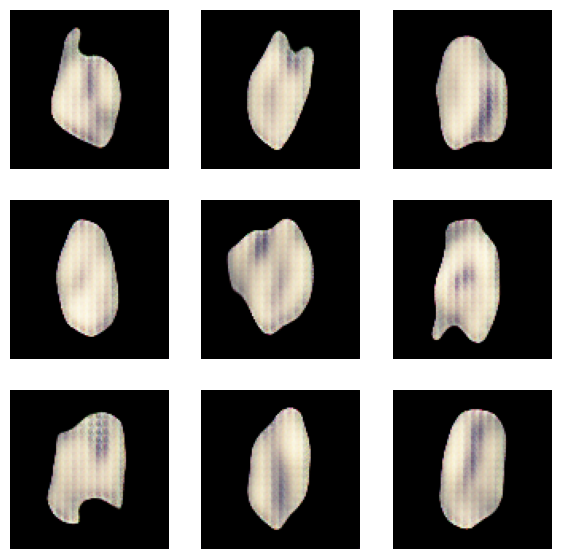

Epoch 80, Step 0, D Loss: 0.414, D Acc: 83.79%, G Loss: 2.350
Epoch 81, Step 0, D Loss: 0.415, D Acc: 83.76%, G Loss: 2.336
Epoch 82, Step 0, D Loss: 0.416, D Acc: 83.67%, G Loss: 2.323
Epoch 83, Step 0, D Loss: 0.417, D Acc: 83.61%, G Loss: 2.308
Epoch 84, Step 0, D Loss: 0.418, D Acc: 83.51%, G Loss: 2.295
Epoch 85, Step 0, D Loss: 0.419, D Acc: 83.46%, G Loss: 2.282
Epoch 86, Step 0, D Loss: 0.420, D Acc: 83.44%, G Loss: 2.270
Epoch 87, Step 0, D Loss: 0.420, D Acc: 83.44%, G Loss: 2.258
Epoch 88, Step 0, D Loss: 0.421, D Acc: 83.38%, G Loss: 2.246
Epoch 89, Step 0, D Loss: 0.422, D Acc: 83.36%, G Loss: 2.234

Generator on Epoch 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


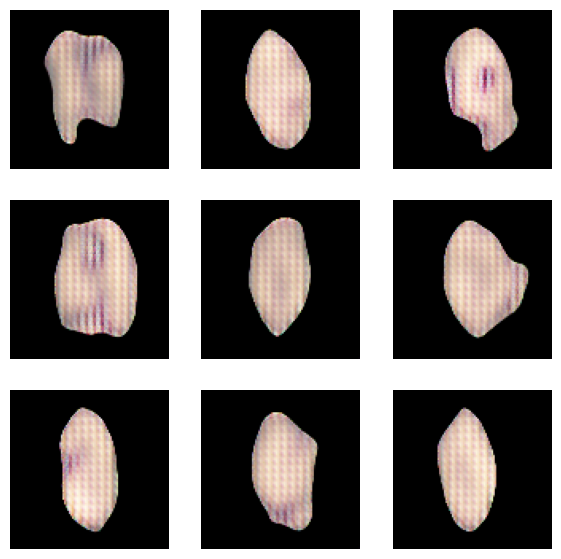

Epoch 90, Step 0, D Loss: 0.422, D Acc: 83.33%, G Loss: 2.222
Epoch 91, Step 0, D Loss: 0.423, D Acc: 83.29%, G Loss: 2.211
Epoch 92, Step 0, D Loss: 0.424, D Acc: 83.27%, G Loss: 2.200
Epoch 93, Step 0, D Loss: 0.424, D Acc: 83.24%, G Loss: 2.190
Epoch 94, Step 0, D Loss: 0.425, D Acc: 83.20%, G Loss: 2.180
Epoch 95, Step 0, D Loss: 0.425, D Acc: 83.19%, G Loss: 2.170
Epoch 96, Step 0, D Loss: 0.425, D Acc: 83.18%, G Loss: 2.160
Epoch 97, Step 0, D Loss: 0.426, D Acc: 83.14%, G Loss: 2.152
Epoch 98, Step 0, D Loss: 0.426, D Acc: 83.13%, G Loss: 2.143
Epoch 99, Step 0, D Loss: 0.427, D Acc: 83.11%, G Loss: 2.134

Generator on Epoch 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


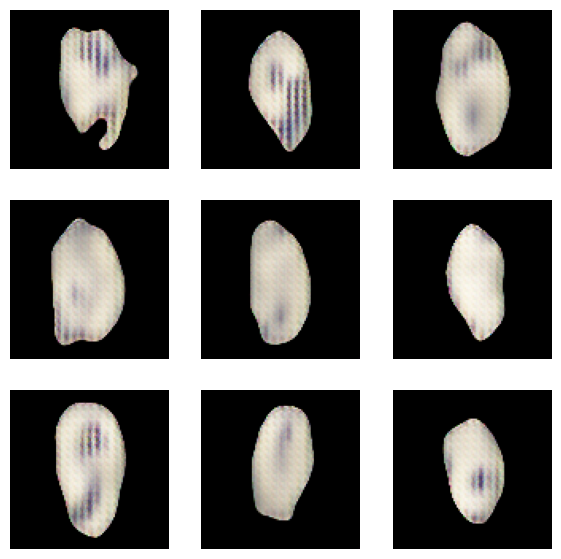

Epoch 100, Step 0, D Loss: 0.427, D Acc: 83.08%, G Loss: 2.126
Epoch 101, Step 0, D Loss: 0.427, D Acc: 83.08%, G Loss: 2.116
Epoch 102, Step 0, D Loss: 0.428, D Acc: 83.07%, G Loss: 2.109
Epoch 103, Step 0, D Loss: 0.428, D Acc: 83.05%, G Loss: 2.101
Epoch 104, Step 0, D Loss: 0.428, D Acc: 83.05%, G Loss: 2.093
Epoch 105, Step 0, D Loss: 0.428, D Acc: 83.06%, G Loss: 2.085
Epoch 106, Step 0, D Loss: 0.428, D Acc: 83.06%, G Loss: 2.077
Epoch 107, Step 0, D Loss: 0.429, D Acc: 83.06%, G Loss: 2.070
Epoch 108, Step 0, D Loss: 0.429, D Acc: 83.04%, G Loss: 2.064
Epoch 109, Step 0, D Loss: 0.429, D Acc: 83.04%, G Loss: 2.057

Generator on Epoch 110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


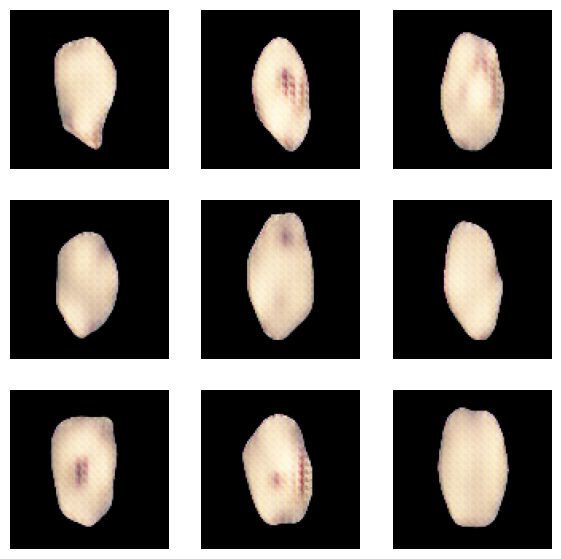

Epoch 110, Step 0, D Loss: 0.429, D Acc: 83.04%, G Loss: 2.050
Epoch 111, Step 0, D Loss: 0.429, D Acc: 83.03%, G Loss: 2.043
Epoch 112, Step 0, D Loss: 0.429, D Acc: 83.04%, G Loss: 2.037
Epoch 113, Step 0, D Loss: 0.429, D Acc: 83.07%, G Loss: 2.031
Epoch 114, Step 0, D Loss: 0.429, D Acc: 83.06%, G Loss: 2.026
Epoch 115, Step 0, D Loss: 0.429, D Acc: 83.09%, G Loss: 2.020
Epoch 116, Step 0, D Loss: 0.429, D Acc: 83.08%, G Loss: 2.016
Epoch 117, Step 0, D Loss: 0.429, D Acc: 83.08%, G Loss: 2.011
Epoch 118, Step 0, D Loss: 0.429, D Acc: 83.07%, G Loss: 2.005
Epoch 119, Step 0, D Loss: 0.429, D Acc: 83.08%, G Loss: 1.999

Generator on Epoch 120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


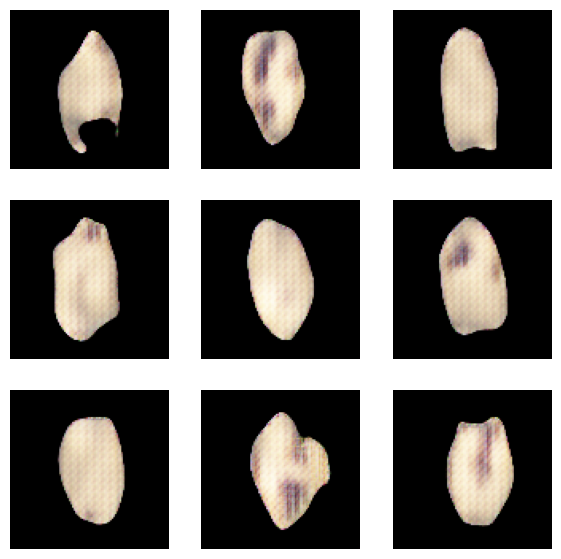

Epoch 120, Step 0, D Loss: 0.429, D Acc: 83.08%, G Loss: 1.994
Epoch 121, Step 0, D Loss: 0.429, D Acc: 83.10%, G Loss: 1.989
Epoch 122, Step 0, D Loss: 0.429, D Acc: 83.10%, G Loss: 1.984
Epoch 123, Step 0, D Loss: 0.429, D Acc: 83.10%, G Loss: 1.979
Epoch 124, Step 0, D Loss: 0.428, D Acc: 83.13%, G Loss: 1.974
Epoch 125, Step 0, D Loss: 0.428, D Acc: 83.14%, G Loss: 1.971
Epoch 126, Step 0, D Loss: 0.428, D Acc: 83.15%, G Loss: 1.966
Epoch 127, Step 0, D Loss: 0.428, D Acc: 83.15%, G Loss: 1.961
Epoch 128, Step 0, D Loss: 0.428, D Acc: 83.17%, G Loss: 1.956
Epoch 129, Step 0, D Loss: 0.428, D Acc: 83.15%, G Loss: 1.952

Generator on Epoch 130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


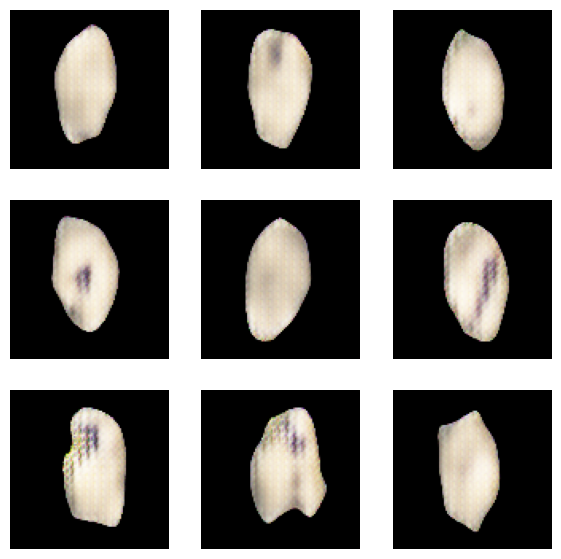

Epoch 130, Step 0, D Loss: 0.428, D Acc: 83.16%, G Loss: 1.947
Epoch 131, Step 0, D Loss: 0.428, D Acc: 83.18%, G Loss: 1.943
Epoch 132, Step 0, D Loss: 0.428, D Acc: 83.18%, G Loss: 1.940
Epoch 133, Step 0, D Loss: 0.428, D Acc: 83.17%, G Loss: 1.935
Epoch 134, Step 0, D Loss: 0.428, D Acc: 83.19%, G Loss: 1.930
Epoch 135, Step 0, D Loss: 0.428, D Acc: 83.20%, G Loss: 1.926
Epoch 136, Step 0, D Loss: 0.428, D Acc: 83.21%, G Loss: 1.922
Epoch 137, Step 0, D Loss: 0.427, D Acc: 83.22%, G Loss: 1.919
Epoch 138, Step 0, D Loss: 0.427, D Acc: 83.23%, G Loss: 1.916
Epoch 139, Step 0, D Loss: 0.427, D Acc: 83.25%, G Loss: 1.912

Generator on Epoch 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


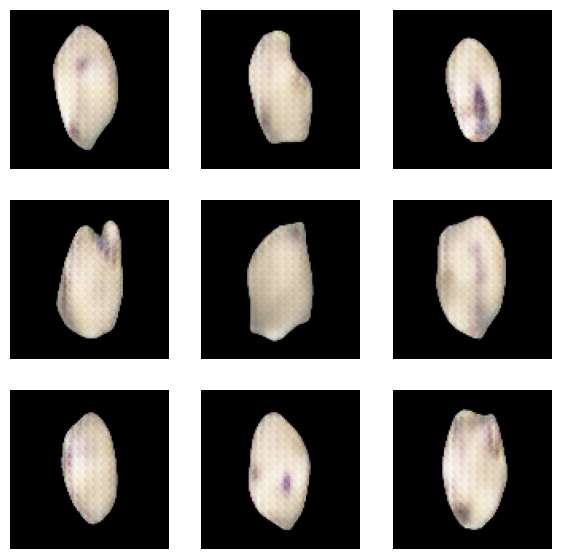

Epoch 140, Step 0, D Loss: 0.427, D Acc: 83.27%, G Loss: 1.908
Epoch 141, Step 0, D Loss: 0.427, D Acc: 83.28%, G Loss: 1.905
Epoch 142, Step 0, D Loss: 0.426, D Acc: 83.29%, G Loss: 1.901
Epoch 143, Step 0, D Loss: 0.426, D Acc: 83.30%, G Loss: 1.898
Epoch 144, Step 0, D Loss: 0.426, D Acc: 83.31%, G Loss: 1.895
Epoch 145, Step 0, D Loss: 0.426, D Acc: 83.33%, G Loss: 1.891
Epoch 146, Step 0, D Loss: 0.425, D Acc: 83.34%, G Loss: 1.888
Epoch 147, Step 0, D Loss: 0.425, D Acc: 83.33%, G Loss: 1.886
Epoch 148, Step 0, D Loss: 0.425, D Acc: 83.36%, G Loss: 1.882
Epoch 149, Step 0, D Loss: 0.425, D Acc: 83.36%, G Loss: 1.880

Generator on Epoch 150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


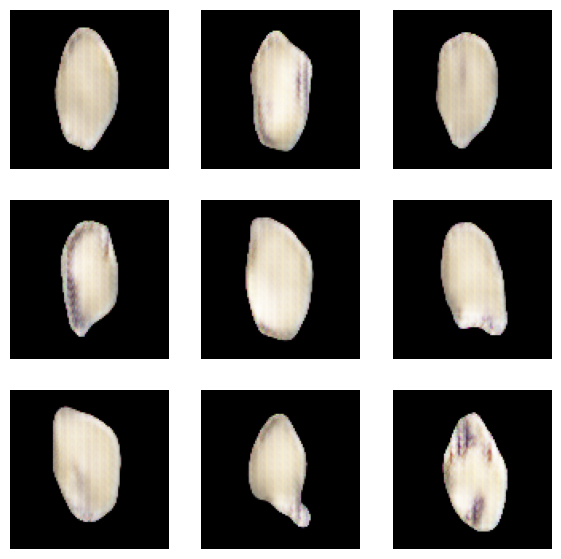

Epoch 150, Step 0, D Loss: 0.425, D Acc: 83.36%, G Loss: 1.877
Epoch 151, Step 0, D Loss: 0.425, D Acc: 83.36%, G Loss: 1.874
Epoch 152, Step 0, D Loss: 0.424, D Acc: 83.37%, G Loss: 1.871
Epoch 153, Step 0, D Loss: 0.424, D Acc: 83.39%, G Loss: 1.868
Epoch 154, Step 0, D Loss: 0.424, D Acc: 83.41%, G Loss: 1.865
Epoch 155, Step 0, D Loss: 0.424, D Acc: 83.42%, G Loss: 1.862
Epoch 156, Step 0, D Loss: 0.423, D Acc: 83.44%, G Loss: 1.860
Epoch 157, Step 0, D Loss: 0.423, D Acc: 83.45%, G Loss: 1.857
Epoch 158, Step 0, D Loss: 0.423, D Acc: 83.48%, G Loss: 1.855
Epoch 159, Step 0, D Loss: 0.423, D Acc: 83.50%, G Loss: 1.853

Generator on Epoch 160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


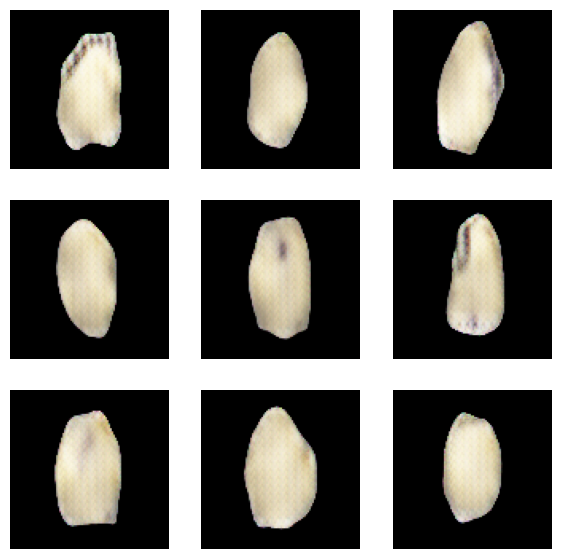

Epoch 160, Step 0, D Loss: 0.422, D Acc: 83.51%, G Loss: 1.851
Epoch 161, Step 0, D Loss: 0.422, D Acc: 83.53%, G Loss: 1.848
Epoch 162, Step 0, D Loss: 0.422, D Acc: 83.56%, G Loss: 1.846
Epoch 163, Step 0, D Loss: 0.421, D Acc: 83.57%, G Loss: 1.844
Epoch 164, Step 0, D Loss: 0.421, D Acc: 83.59%, G Loss: 1.842
Epoch 165, Step 0, D Loss: 0.421, D Acc: 83.61%, G Loss: 1.840
Epoch 166, Step 0, D Loss: 0.420, D Acc: 83.63%, G Loss: 1.838
Epoch 167, Step 0, D Loss: 0.420, D Acc: 83.63%, G Loss: 1.836
Epoch 168, Step 0, D Loss: 0.420, D Acc: 83.64%, G Loss: 1.834
Epoch 169, Step 0, D Loss: 0.420, D Acc: 83.66%, G Loss: 1.833

Generator on Epoch 170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


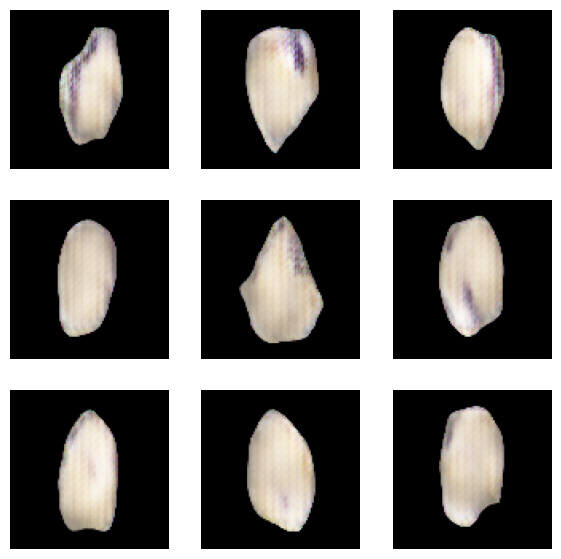

Epoch 170, Step 0, D Loss: 0.420, D Acc: 83.67%, G Loss: 1.831
Epoch 171, Step 0, D Loss: 0.419, D Acc: 83.69%, G Loss: 1.829
Epoch 172, Step 0, D Loss: 0.419, D Acc: 83.71%, G Loss: 1.827
Epoch 173, Step 0, D Loss: 0.419, D Acc: 83.73%, G Loss: 1.826
Epoch 174, Step 0, D Loss: 0.418, D Acc: 83.74%, G Loss: 1.825
Epoch 175, Step 0, D Loss: 0.418, D Acc: 83.77%, G Loss: 1.823
Epoch 176, Step 0, D Loss: 0.418, D Acc: 83.79%, G Loss: 1.822
Epoch 177, Step 0, D Loss: 0.417, D Acc: 83.81%, G Loss: 1.821
Epoch 178, Step 0, D Loss: 0.417, D Acc: 83.83%, G Loss: 1.820
Epoch 179, Step 0, D Loss: 0.417, D Acc: 83.85%, G Loss: 1.819

Generator on Epoch 180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


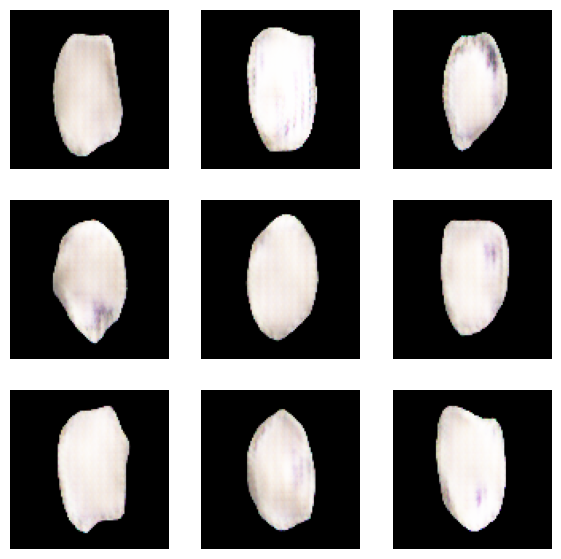

Epoch 180, Step 0, D Loss: 0.416, D Acc: 83.86%, G Loss: 1.818
Epoch 181, Step 0, D Loss: 0.416, D Acc: 83.87%, G Loss: 1.817
Epoch 182, Step 0, D Loss: 0.416, D Acc: 83.88%, G Loss: 1.816
Epoch 183, Step 0, D Loss: 0.415, D Acc: 83.90%, G Loss: 1.815
Epoch 184, Step 0, D Loss: 0.415, D Acc: 83.91%, G Loss: 1.813
Epoch 185, Step 0, D Loss: 0.415, D Acc: 83.92%, G Loss: 1.812
Epoch 186, Step 0, D Loss: 0.415, D Acc: 83.94%, G Loss: 1.810
Epoch 187, Step 0, D Loss: 0.414, D Acc: 83.97%, G Loss: 1.809
Epoch 188, Step 0, D Loss: 0.414, D Acc: 83.98%, G Loss: 1.808
Epoch 189, Step 0, D Loss: 0.414, D Acc: 84.00%, G Loss: 1.807

Generator on Epoch 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


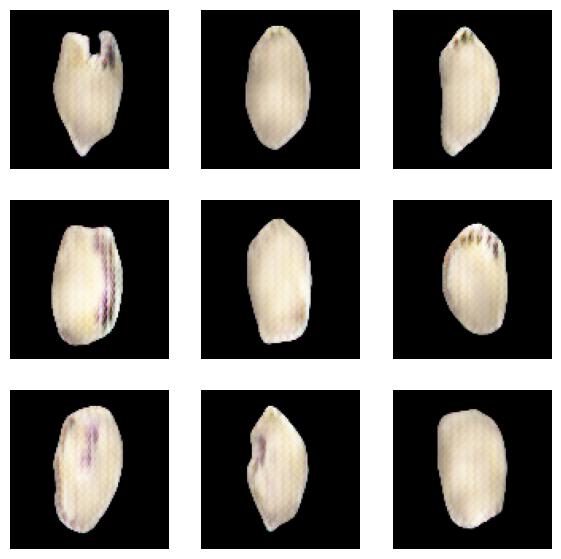

Epoch 190, Step 0, D Loss: 0.413, D Acc: 84.02%, G Loss: 1.806
Epoch 191, Step 0, D Loss: 0.413, D Acc: 84.04%, G Loss: 1.806
Epoch 192, Step 0, D Loss: 0.412, D Acc: 84.07%, G Loss: 1.805
Epoch 193, Step 0, D Loss: 0.412, D Acc: 84.09%, G Loss: 1.804
Epoch 194, Step 0, D Loss: 0.412, D Acc: 84.10%, G Loss: 1.803
Epoch 195, Step 0, D Loss: 0.411, D Acc: 84.13%, G Loss: 1.802
Epoch 196, Step 0, D Loss: 0.411, D Acc: 84.14%, G Loss: 1.805
Epoch 197, Step 0, D Loss: 0.410, D Acc: 84.16%, G Loss: 1.807
Epoch 198, Step 0, D Loss: 0.410, D Acc: 84.17%, G Loss: 1.806
Epoch 199, Step 0, D Loss: 0.410, D Acc: 84.20%, G Loss: 1.805


In [ ]:
epochs = 200
batch_size = 100
steps_per_epoch = 20

losses_d = []
losses_g = []

for epoch in range(epochs):

    if epoch % 10 == 0:
        print(f"\nGenerator on Epoch {epoch}")
        show_generator_results(generator_model_mod, noise_dim_mod)

    for step in range(steps_per_epoch):

        # 1. Latih Discriminator
        fake_images = get_fake_samples(generator_model_mod, batch_size // 2, noise_dim_mod)
        real_images = get_real_samples(batch_size // 2)

        combined_images = np.vstack((fake_images, real_images))
        labels = np.vstack((
            np.zeros((batch_size // 2, 1)),  # Fake = 0
            np.ones((batch_size // 2, 1))    # Real = 1
        ))

        discriminator_model.trainable = True
        loss_d = discriminator_model.train_on_batch(combined_images, labels)

        # 2. Latih Generator via GAN
        noise = get_random_noise(batch_size, noise_dim_mod)
        misleading_labels = np.ones((batch_size, 1))  # Target = Real (biar generator nipu discriminator)

        discriminator_model.trainable = False
        loss_g = gan_model_mod.train_on_batch(noise, misleading_labels)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)

        # Print tiap 50 step
        if step % 50 == 0:
            print(f"Epoch {epoch}, Step {step}, D Loss: {loss_d[0]:.3f}, D Acc: {loss_d[1]*100:.2f}%, G Loss: {loss_g:.3f}")


Selama proses training, generator pada awalnya menunjukkan performa yang kurang baik, terlihat dari nilai loss yang masih kecil dan belum stabil. Sementara itu, discriminator cukup cepat belajar membedakan gambar asli dan palsu, ditandai dengan akurasi yang langsung melonjak di atas 90% dalam beberapa epoch pertama. Namun, seiring waktu, generator mulai beradaptasi dan mampu menghasilkan gambar yang lebih baik, yang ditunjukkan oleh meningkatnya loss pada discriminator serta turunnya akurasi discriminator secara perlahan. Memasuki sekitar epoch ke-50, kompetisi antara kedua model mulai lebih seimbang, ditandai dengan nilai loss yang cenderung stabil dan perbedaan akurasi yang tidak terlalu signifikan.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


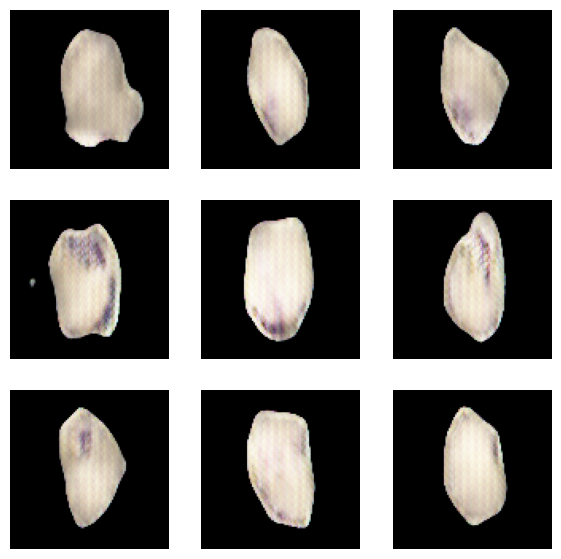

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


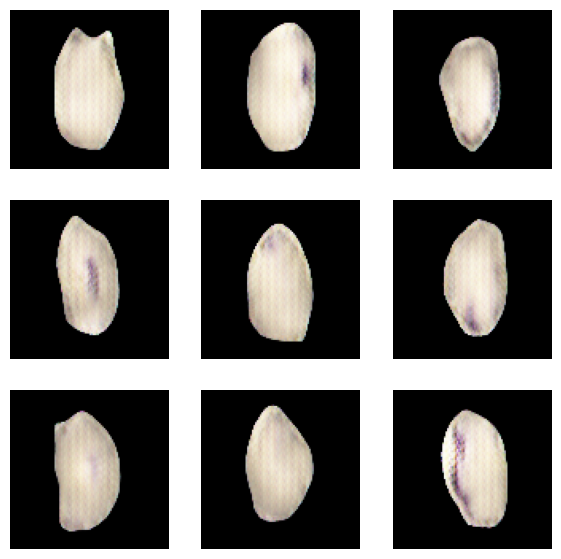

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


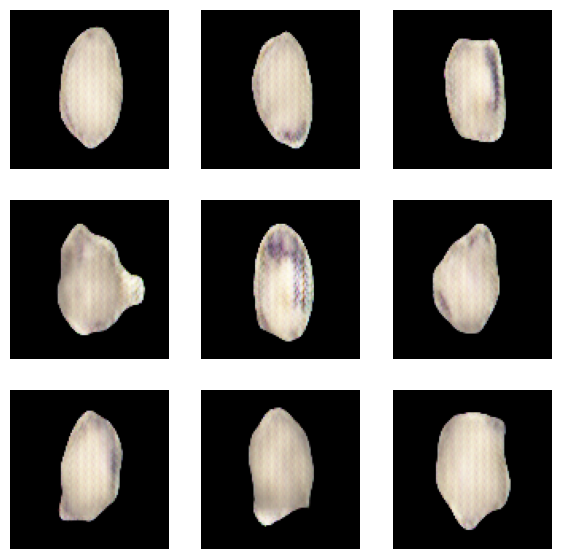

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


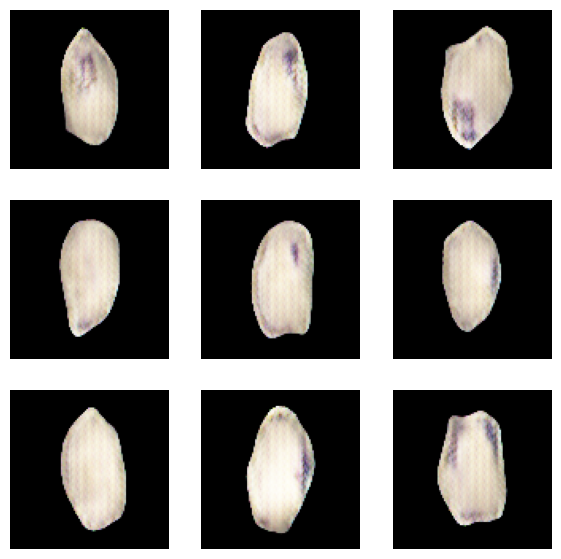

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


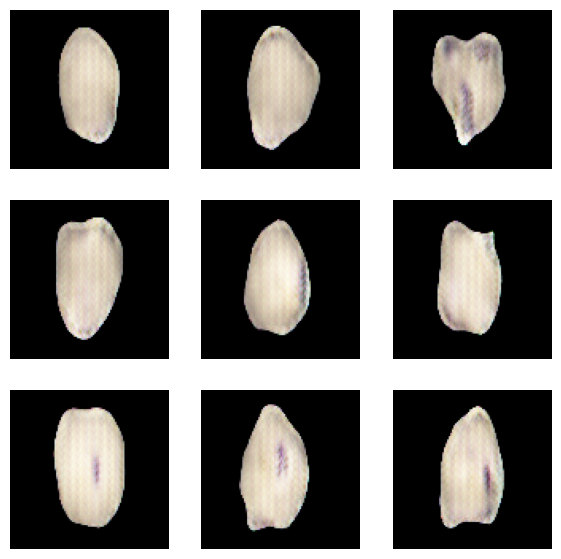

In [ ]:
for i in range(5):
    show_generator_results(generator_model_mod, noise_dim_mod)

Ini nge generate gambar gambar sampel pake model yang udah di modifikasi

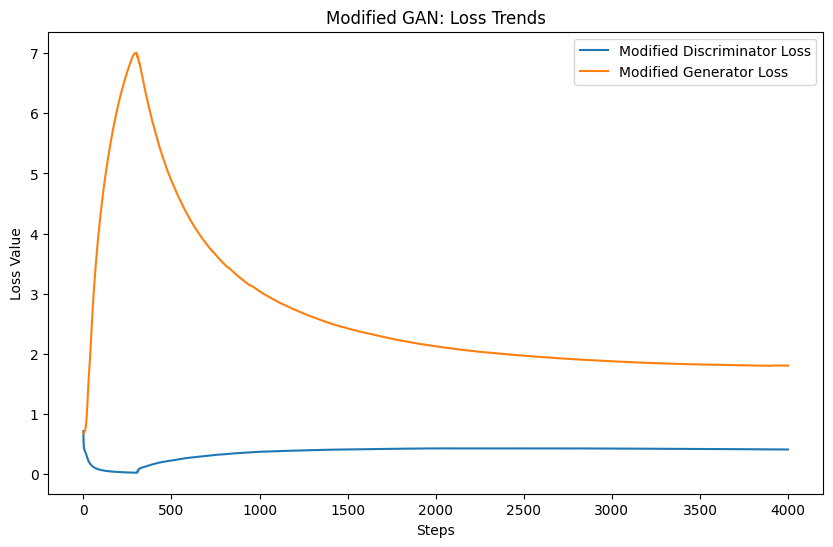

In [ ]:
# Visualisasi Loss Discriminator & Generator
steps = [i for i in range(len(losses_d))]

plt.figure(figsize=(10, 6))
plt.plot(steps[:5000], losses_d[:5000], label='Modified Discriminator Loss')
plt.plot(steps[:5000], losses_g[:5000], label='Modified Generator Loss')
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("Modified GAN: Loss Trends")
plt.legend()
plt.show()

Pada grafik modifikasi ini, pola tren loss masih serupa dengan model awal, namun terdapat beberapa perbedaan mencolok. Generator loss mengalami lonjakan yang lebih tinggi hingga sekitar nilai 7 sebelum akhirnya menurun secara konsisten. Lonjakan ini menunjukkan bahwa di awal pelatihan, generator lebih sulit menghasilkan data yang realistis — kemungkinan karena kompleksitas tambahan dari arsitektur yang dimodifikasi. Meski begitu, penurunan yang stabil menunjukkan adanya pembelajaran yang efektif dari generator.

Sementara itu, discriminator loss menurun tajam di awal dan kemudian naik perlahan, pola yang umum pada GAN, menandakan bahwa membedakan data asli dan palsu menjadi semakin sulit. Dibandingkan model awal, discriminator loss akhir pada model modifikasi sedikit lebih rendah, yang bisa diartikan sebagai stabilitas yang lebih baik dan keseimbangan pelatihan yang tetap terjaga.

# 3.C

## Fréchet Inception Distance (FID) Evaluation

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from scipy.linalg import sqrtm
import numpy as np
import tensorflow as tf

# load inceptionV3 model
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# aktivasi fitur
def get_activations(images):
    images = tf.convert_to_tensor(images)
    images = (images + 1) * 127.5
    images = tf.image.resize(images, (299, 299))
    images = preprocess_input(images)
    act = inception_model(images, training=False)
    return act.numpy()

# FID function
def calculate_fid(real_images, fake_images):
    act1 = get_activations(real_images)
    act2 = get_activations(fake_images)
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    ssdiff = np.sum((mu1 - mu2)**2)
    covmean = sqrtm(sigma1 @ sigma2)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid

def get_real_samples(n):
    idx = np.random.choice(train_images.shape[0], n, replace=False)
    return train_images[idx]

def get_fake_samples(generator, n, noise_dim):
    noise = np.random.randn(n, noise_dim)
    return generator.predict(noise)

real_subset = get_real_samples(100)
real_subset = (real_subset + 1) / 2.0

# baseline
fake_base = get_fake_samples(generator_model, 100, noise_dim)
fake_base = (fake_base + 1) / 2.0
fid_base = calculate_fid(real_subset, fake_base)

# modified
fake_mod = get_fake_samples(generator_model_mod, 100, noise_dim_mod)
fake_mod = (fake_mod + 1) / 2.0
fid_mod = calculate_fid(real_subset, fake_mod)

print(f"FID Baseline : {fid_base:.4f}")
print(f"FID Modified : {fid_mod:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
FID Baseline : 220.7213
FID Modified : 193.5363


Berdasarkan hasil evaluasi menggunakan metrik Fréchet Inception Distance (FID), model baseline menghasilkan FID sebesar 220.7213, sedangkan model modifikasi menghasilkan FID sebesar 193.5363. FID yang lebih rendah menunjukkan bahwa gambar hasil generator semakin mirip dengan distribusi gambar asli, sehingga kualitas gambar generator meningkat. Dengan demikian, model modifikasi terbukti mampu menghasilkan gambar sintetis yang lebih realistis dibandingkan model baseline. Penurunan nilai FID ini dapat disebabkan oleh perubahan arsitektur generator, yakni pada pengurangan dimensi input noise yang memungkinkan generator lebih fokus mempelajari representasi penting. Meskipun FID masih tergolong cukup besar secara absolut, tren penurunannya menunjukkan adanya perbaikan kinerja model.

# 3.D

## Link Video

https://binusianorg-my.sharepoint.com/personal/jonathan_gani_binus_ac_id/_layouts/15/guestaccess.aspx?share=EXgw0nOS4WtAj-SL5c9qBY8BSiSxe3enbF5Ch1x8mgvvzQ&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=cJzzsf